In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
from datetime import datetime

output_path = '/data/shared/src/STV/simscenes/LidarSimulation/figs/veg_input'
redwood_path_prefix = "redwood_output/"
guiana_path_prefix = "guiana_output/"

object_path = '/data/shared/src/STV/simscenes/LidarSimulation/object_data/'

In [2]:
def load_objects_from_file(filename, obj_path):
    # Adjust the filename to include the subfolder
    filename = os.path.join(obj_path, filename)
        
    # Load the objects from file
    with open(filename, 'rb') as f:
        objects_list = pickle.load(f)
    
    return objects_list

def get_date_subfolder():
    current_date = datetime.now()
    return current_date.strftime('%Y_%m_%d')

In [3]:
redwood_tree_objects_branch_orig = load_objects_from_file("redwood_tree_objects_branch_orig.pkl", object_path)
redwood_tree_objects_0_01_branch = load_objects_from_file("redwood_tree_objects_branch_origB10th.pkl", object_path)
guiana_tree_objects_leaf_orig = load_objects_from_file("guiana_tree_objects_leaf_orig.pkl", object_path)
guiana_tree_objects_leaf_div10 = load_objects_from_file("guiana_tree_objects_leaf_div10.pkl", object_path)
guiana_tree_objects_leaf_div30 = load_objects_from_file("guiana_tree_objects_leaf_div30.pkl", object_path)
redwood_circle_objects_orig = load_objects_from_file("redwood_circle_objects_orig.pkl", object_path)
redwood_circle_objects_0_01_branch = load_objects_from_file("redwood_circle_objects_origB10th.pkl", object_path)
guiana_circle_objects_leaf_orig = load_objects_from_file("guiana_circle_objects_leaf_orig.pkl", object_path)
guiana_circle_objects_leaf_div10 = load_objects_from_file("guiana_circle_objects_leaf_div10.pkl", object_path)
guiana_circle_objects_leaf_div30 = load_objects_from_file("guiana_circle_objects_leaf_div30.pkl", object_path)

date_subfolder = get_date_subfolder()

In [4]:
def plot_tree_densities(circle_objects, output_folder, output_filename):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
    # Extract circle names and tree densities
    circle_names = [circle.circle_name for circle in circle_objects]
    tree_densities = [circle.tree_density for circle in circle_objects]

    # Plotting the bar graph
    plt.figure(figsize=(20, 12))
    plt.bar(circle_names, tree_densities, color='skyblue')
    
    # Set the title based on the output filename
    if "redwood" in output_filename:
        plt.title('Tree Densities of All Circles in California Redwood 008')
    elif "guiana" in output_filename:
        plt.title('Tree Densities of All Circles in French Guiana 008')
    else:
        plt.title('Tree Densities of All Circles')
        
    plt.xlabel('Circle Names')
    plt.ylabel('Tree Density 1/m^2')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()

    # Customize plot parameters
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 30
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

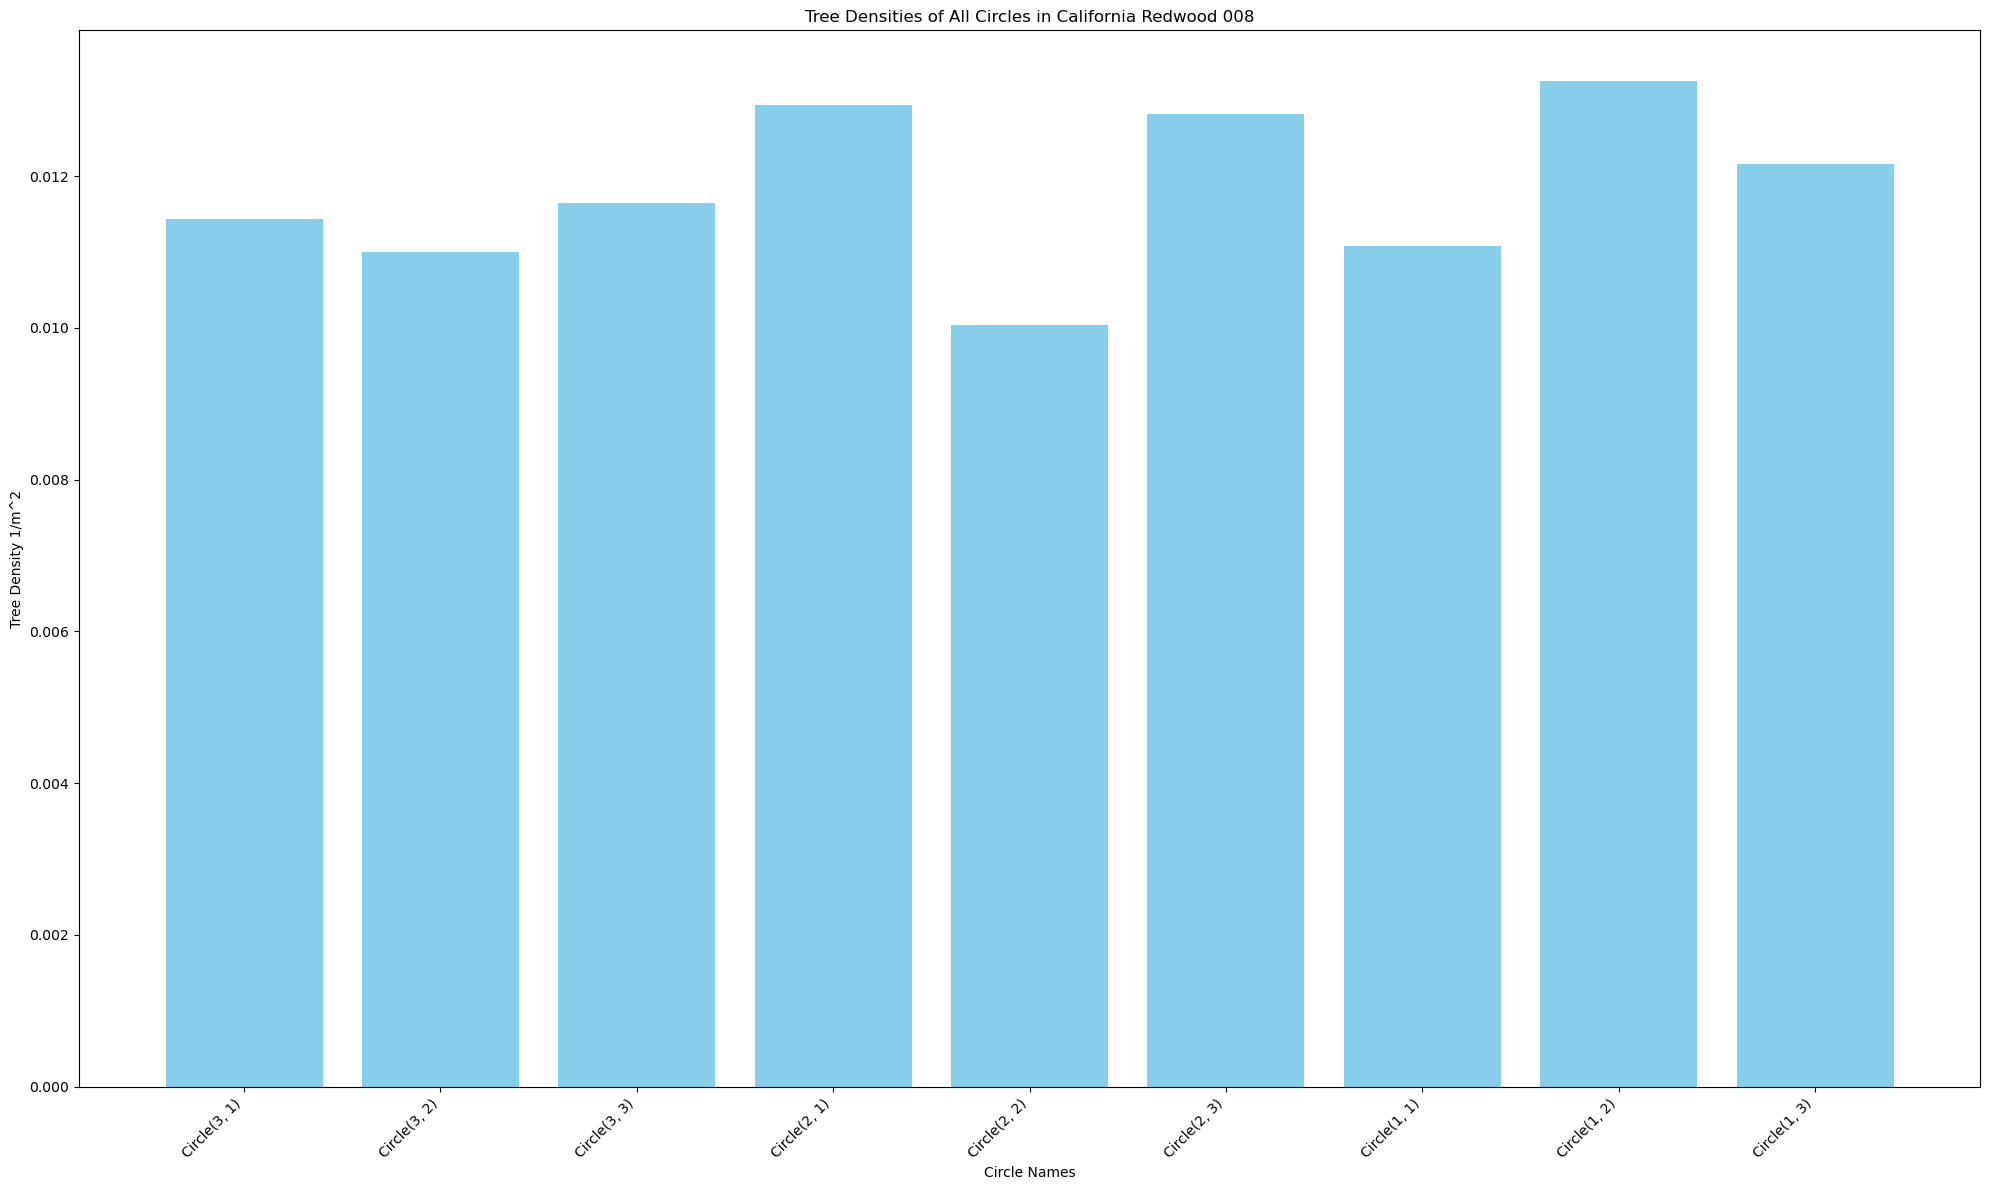

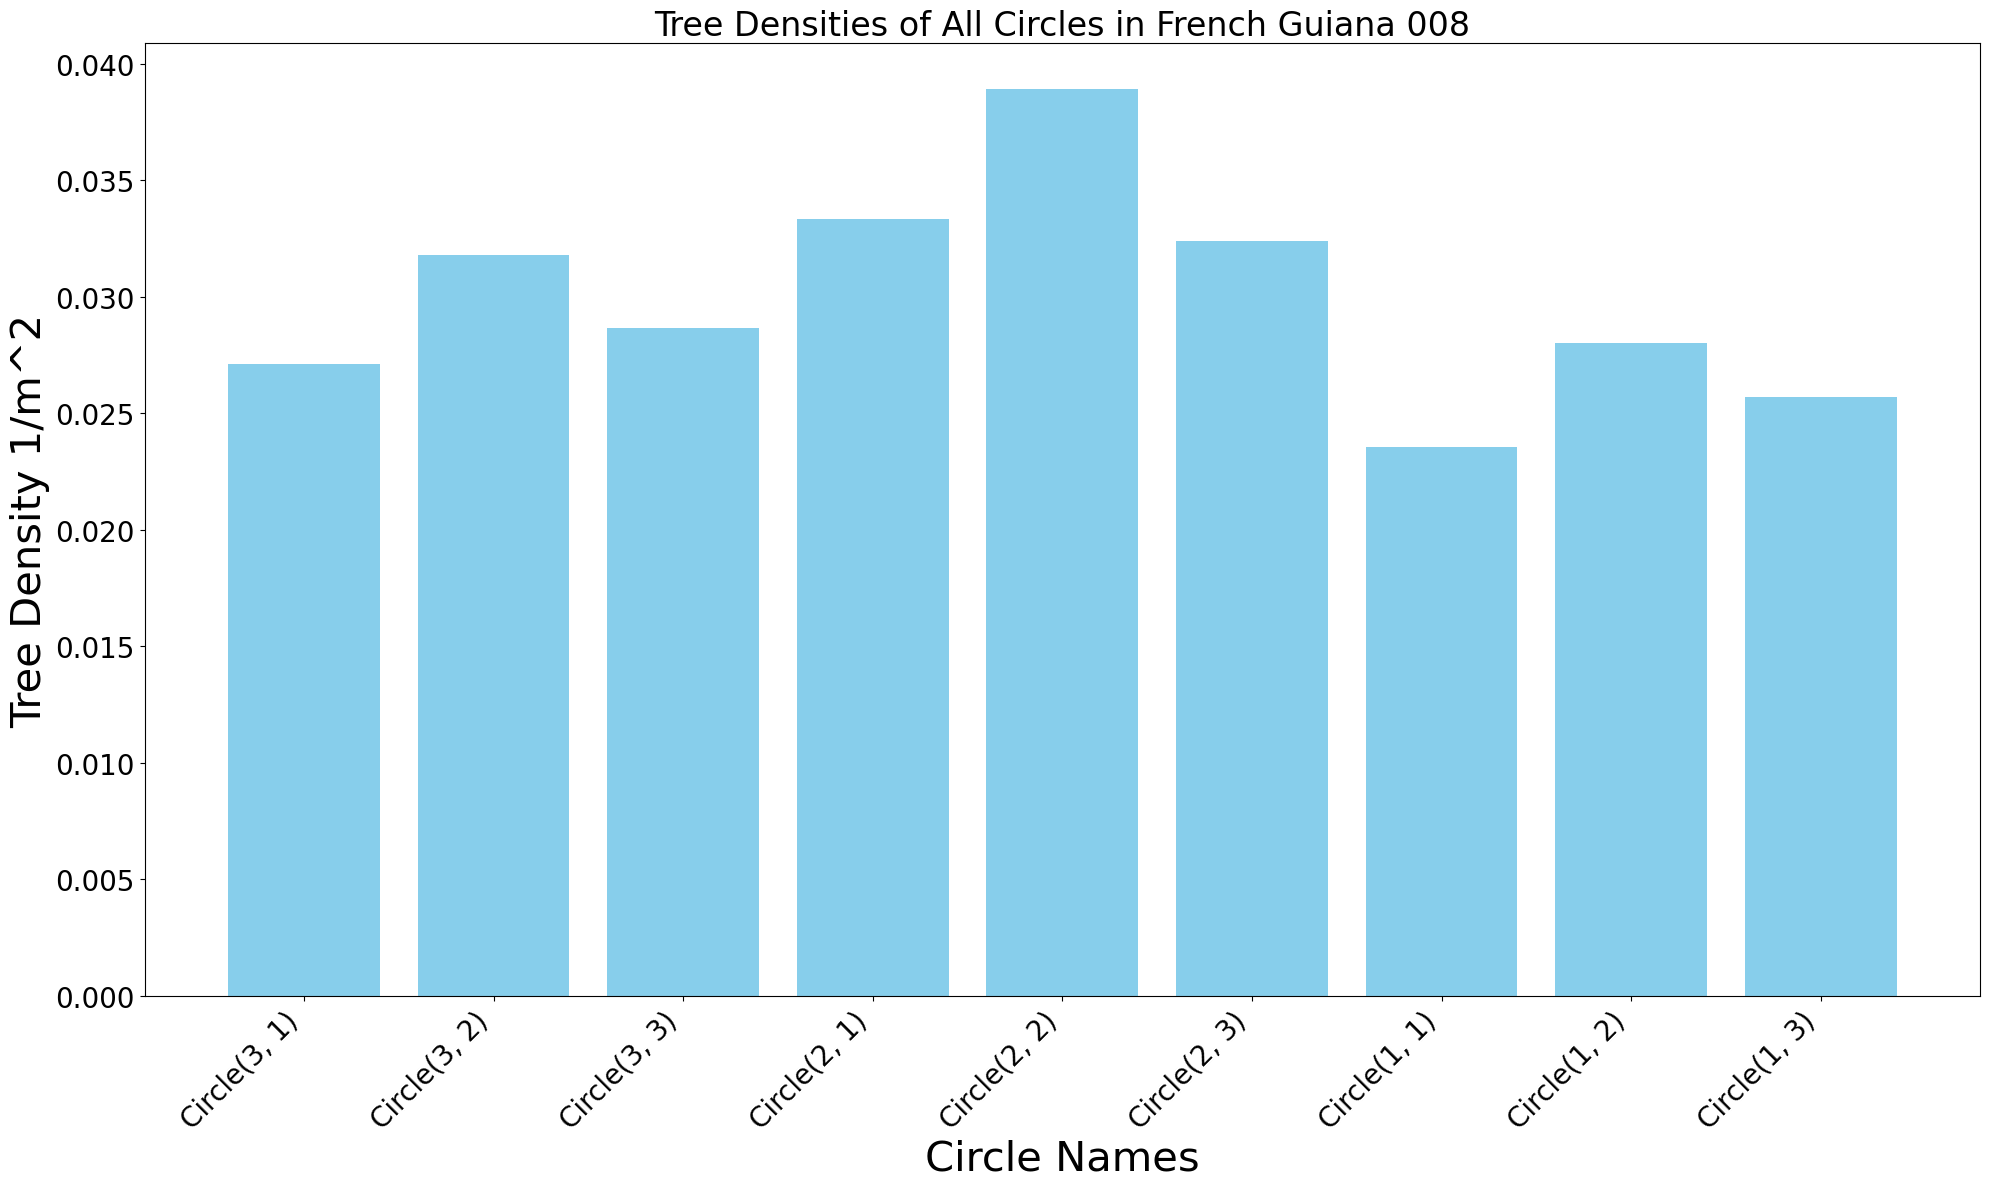

In [5]:
# Define the directory to save the figures
redwood_output_folder = "redwood_output/graphs_and_plots"
guiana_output_folder = "guiana_output/graphs_and_plots"
redwood_output_filename = "redwood_tree_densities.png"
guiana_output_filename = "guiana_tree_densities.png"

redwood_output_file_path = os.path.join(output_path, date_subfolder, redwood_output_folder)
guiana_output_file_path = os.path.join(output_path, date_subfolder, guiana_output_folder)

plot_tree_densities(redwood_circle_objects_orig, redwood_output_file_path, redwood_output_filename)
plot_tree_densities(guiana_circle_objects_leaf_orig, guiana_output_file_path, guiana_output_filename)

In [6]:
def plot_tree_metrics(tree_objects, output_folder, output_filename):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    tree_heights = [tree.tree_height for tree in tree_objects]
    crown_d1_values = [tree.crown_d1 for tree in tree_objects]
    crown_d2_values = [tree.crown_d2 for tree in tree_objects]

    # Create subplots
    fig, axs = plt.subplots(1, 3, figsize=(24, 12))

    # Plot crown_d2 vs tree_height
    axs[0].scatter(tree_heights, crown_d2_values, color='blue', alpha=0.5)
    axs[0].set_title('Crown Radius vs Tree Height')
    axs[0].set_xlabel('Tree Height (meters)')
    axs[0].set_ylabel('Crown Radius')
    axs[0].grid(True)

    # Plot crown_d1 vs tree_height
    axs[1].scatter(tree_heights, crown_d1_values, color='green', alpha=0.5)
    axs[1].set_title('Crown Depth vs Tree Height')
    axs[1].set_xlabel('Tree Height (meters)')
    axs[1].set_ylabel('Crown Depth')
    axs[1].grid(True)

    # Calculate crown_d2/h values
    crown_d2_over_h_values = [d2 / h for d2, h in zip(crown_d2_values, tree_heights)]

    # Plot crown_d2/h vs tree_height
    axs[2].scatter(tree_heights, crown_d2_over_h_values, color='red', alpha=0.5)
    axs[2].set_title('Crown Radius/Tree Height\n vs Tree Height')
    axs[2].set_xlabel('Tree Height (meters)')
    axs[2].set_ylabel('Crown Radius / Tree Height')
    axs[2].grid(True)

    # Set the suptitle and adjust layout
    if "redwood" in output_filename:
        plt.suptitle('California Redwood Tree Metrics', x=0.5, y=0.90, fontsize=36) 
    elif "guiana" in output_filename:
        plt.suptitle('French Guiana Tree Metrics', x=0.5, y=0.90, fontsize=36)
        
    plt.subplots_adjust(top=0.80, bottom=0.08, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path, bbox_inches = 'tight')

    plt.show()

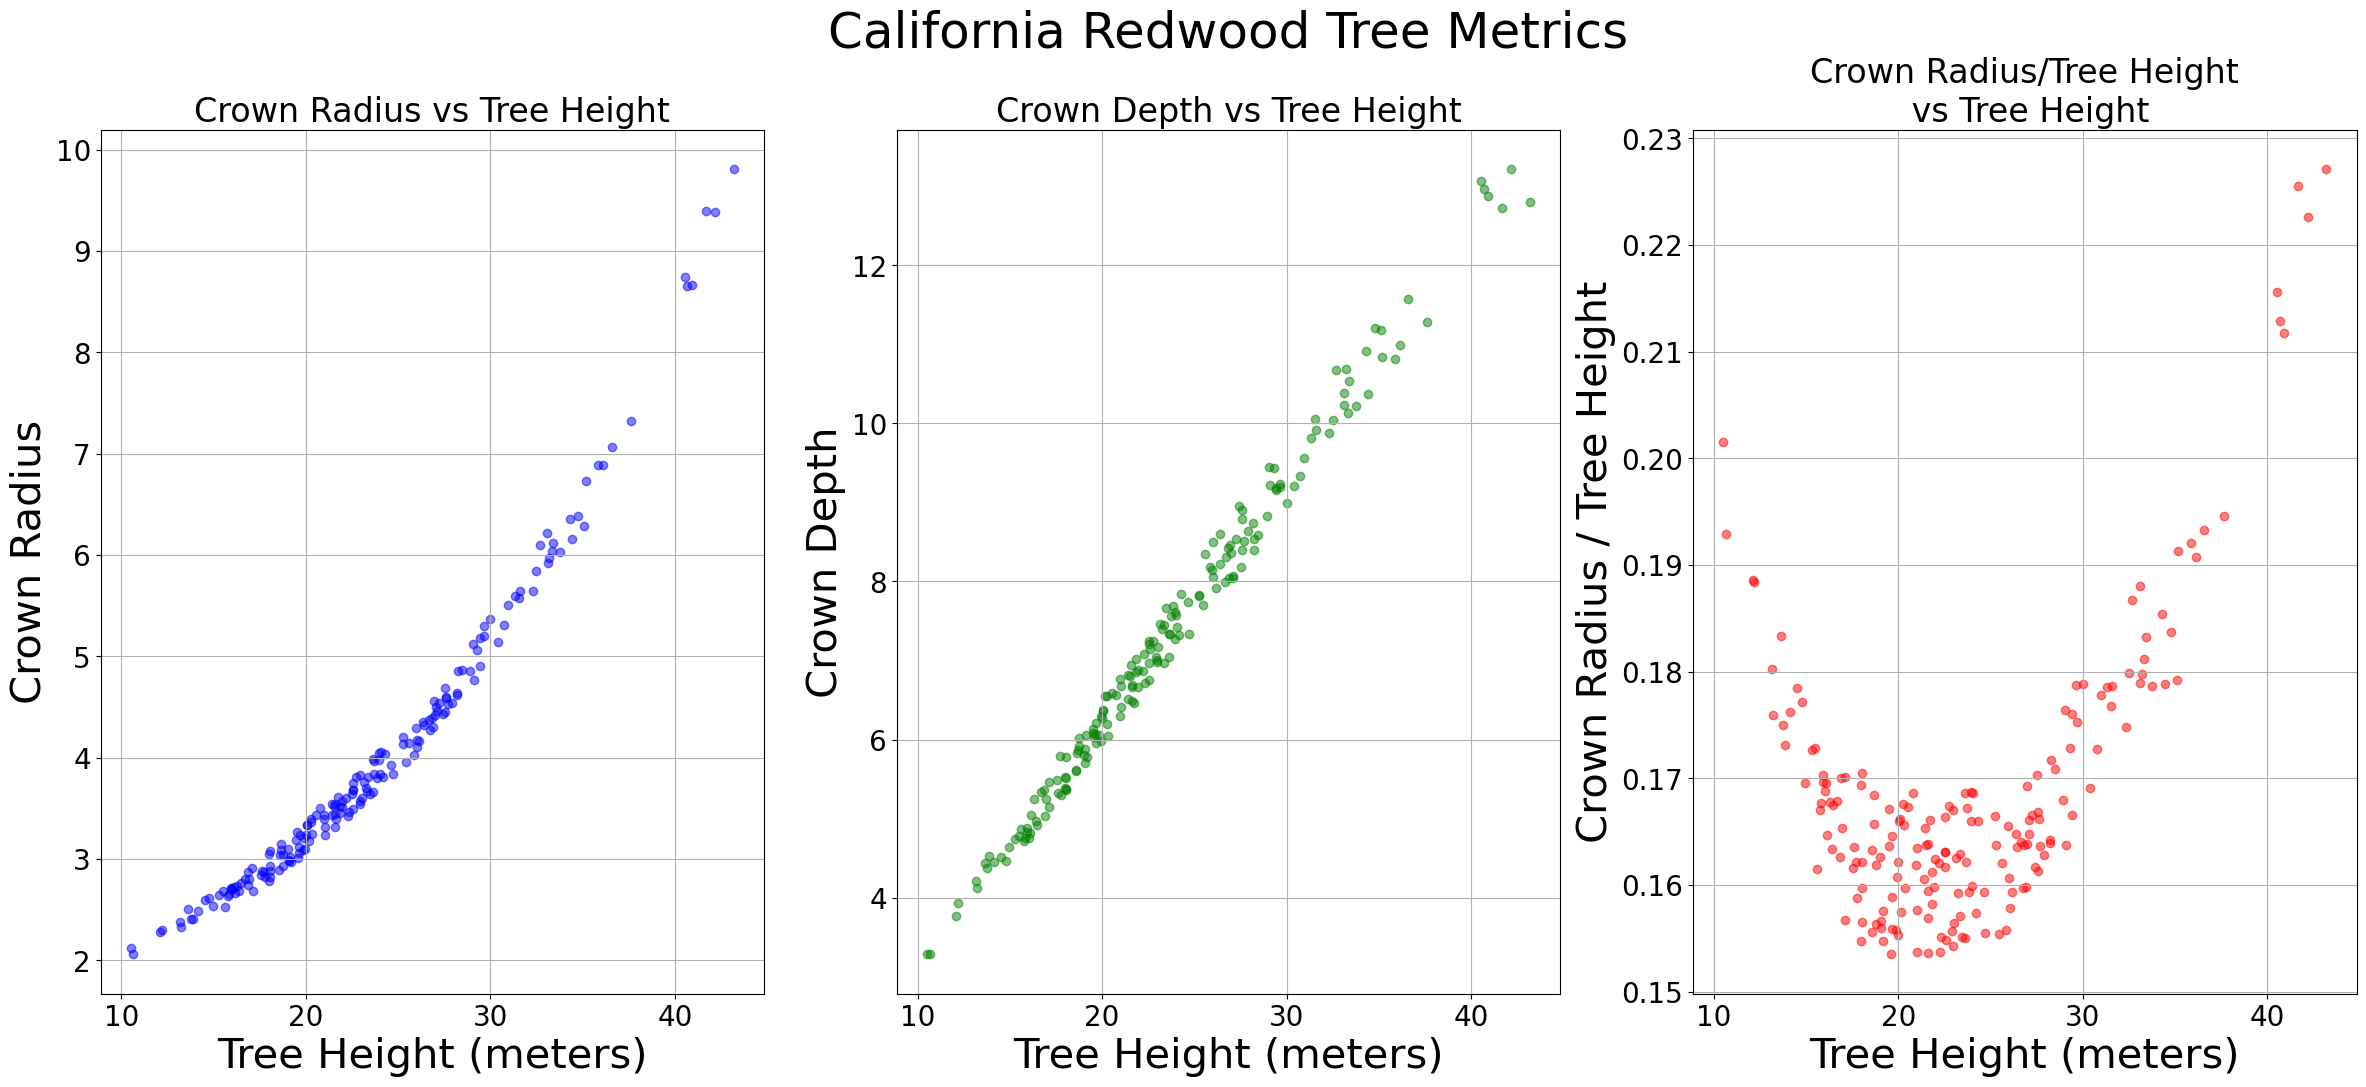

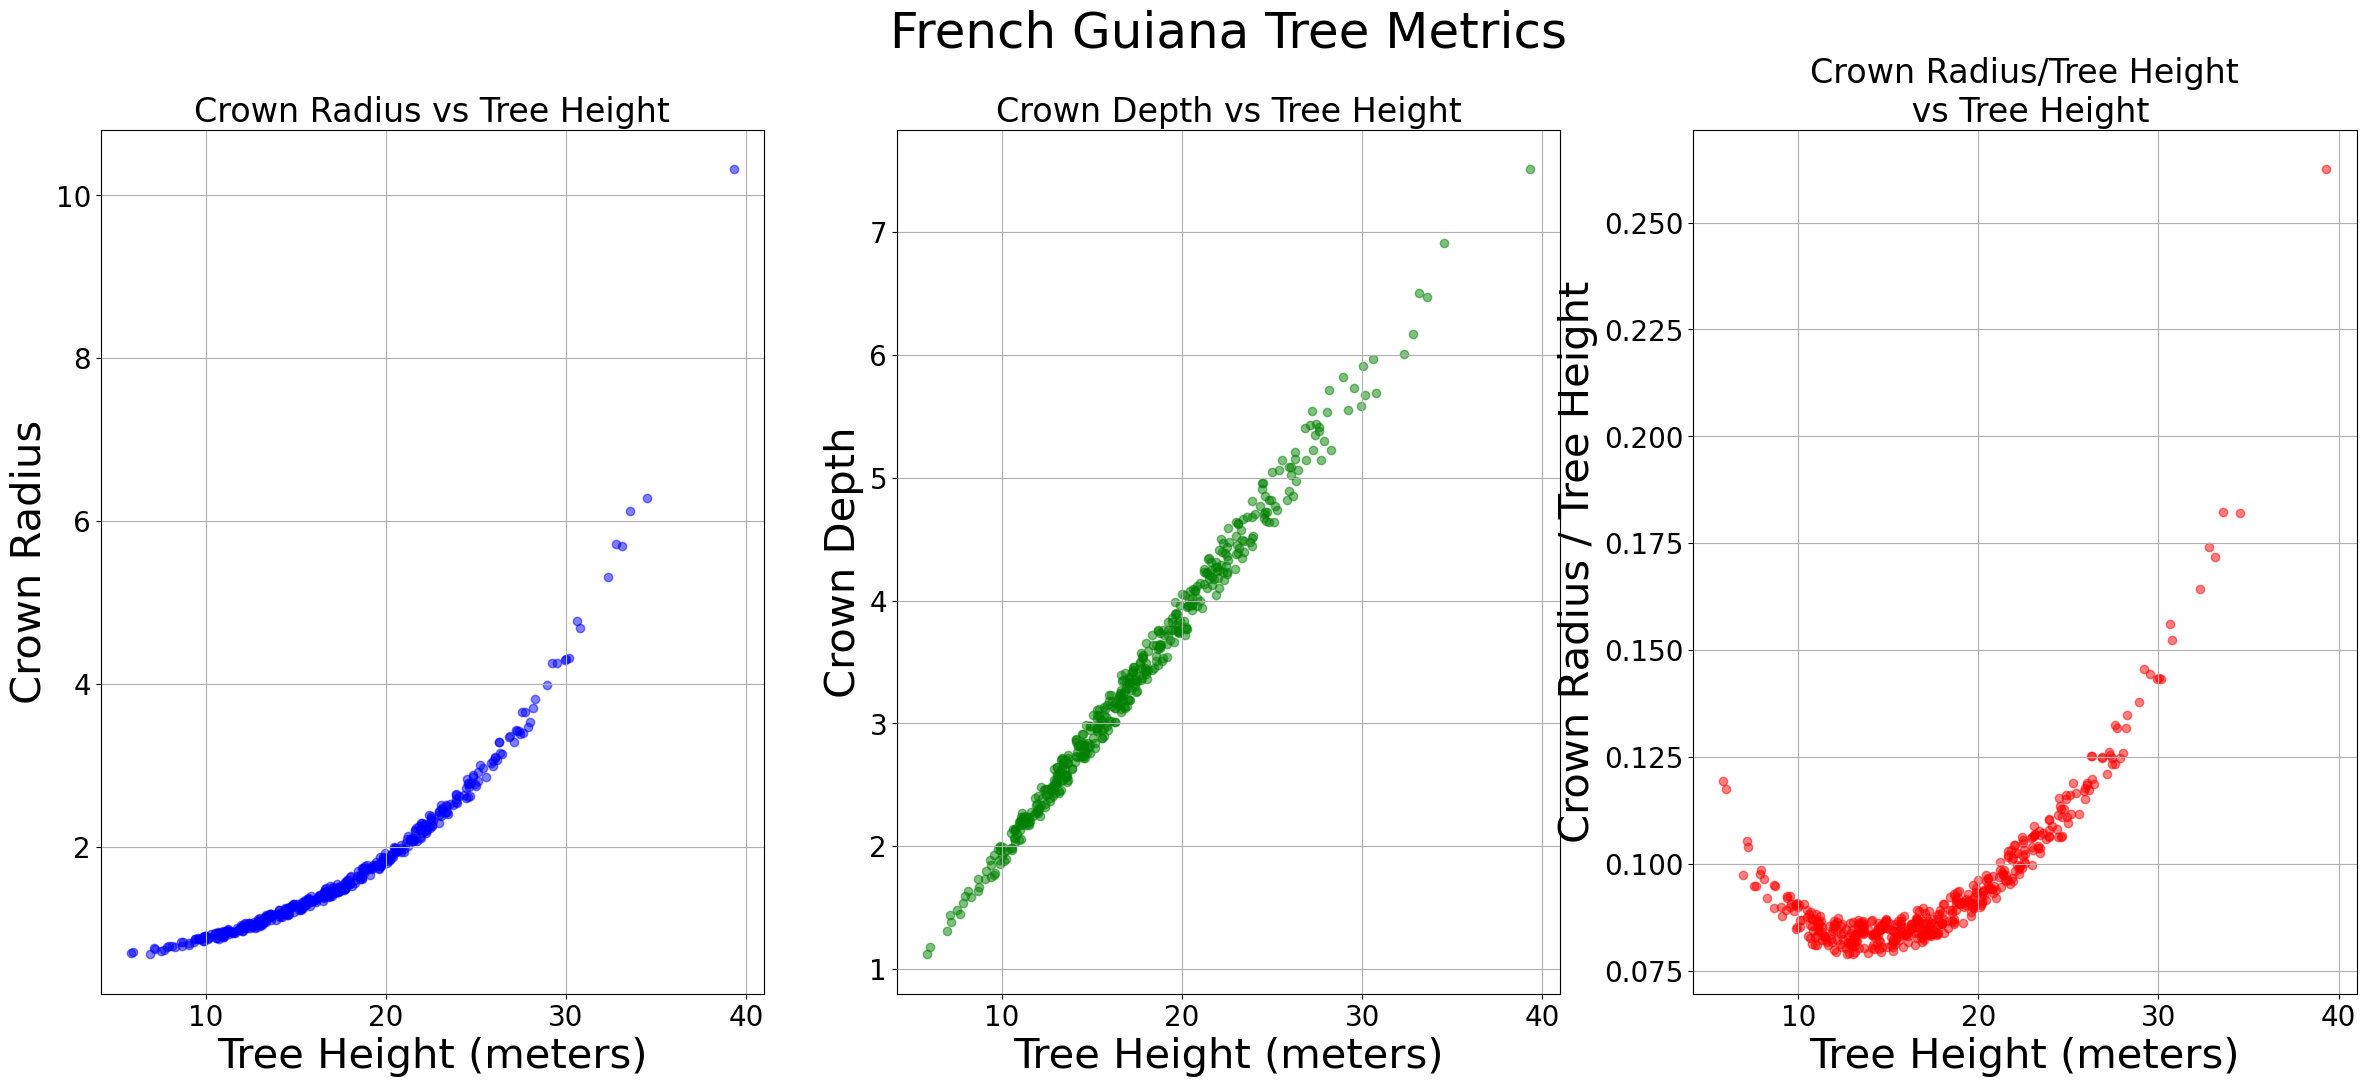

In [7]:
redwood_output_filename = "redwood_tree_metrics.png"
guiana_output_filename = "guiana_tree_metrics.png"

plot_tree_metrics(redwood_tree_objects_branch_orig, redwood_output_file_path, redwood_output_filename)
plot_tree_metrics(guiana_tree_objects_leaf_orig, guiana_output_file_path, guiana_output_filename)

In [ ]:
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

def plot_crown_radius_count(tree_objects, circle_objects, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    for i, circle in enumerate(circle_objects):
        all_crown_d2_values = [tree_objects[tree_index - 1].crown_d2 for tree_index in circle.tree_indices]
        # print(all_crown_d2_values)
        
        # Plot histogram for all crown_d2 values in the current circle
        x_min = min(all_crown_d2_values)
        x_max = max(all_crown_d2_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_crown_d2_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle.circle_name)
        axs_flat[i].set_xlabel('Crown Radius (m)')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Crown Radius Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_tree_height_count(tree_objects, circle_objects, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    for i, circle in enumerate(circle_objects):
        all_tree_height_values = [tree_objects[tree_index - 1].tree_height for tree_index in circle.tree_indices]

        # Debugging: print tree heights greater than 25
        heights_over_25 = [height for height in all_tree_height_values if height > 25]
        if heights_over_25:
            print(f"Circle {circle.circle_name} has trees with heights over 25m: {heights_over_25}")
        
        # Plot histogram for all tree height values in the current circle
        x_min = min(all_tree_height_values)
        x_max = max(all_tree_height_values)
        x_range = x_max - x_min
        bar_width = x_range / 45 # Adjust divisor as needed
        axs_flat[i].hist(all_tree_height_values, bins=35, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle.circle_name)
        axs_flat[i].set_xlabel('Tree Height (m)')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Tree Height Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_width_tree_height_ratio_count(tree_objects, circle_objects, output_folder, output_filename, plot_title):
    # Define the number of rows and columns for subplot arrangement
    num_rows = 3
    num_cols = 3

    # Create subplots for each circle
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 20))

    # Flatten the axes array to iterate over it with a single loop
    axs_flat = axs.flatten()

    for i, circle in enumerate(circle_objects):
        all_crown_d2_values = np.array([tree_objects[tree_index - 1].crown_d2 for tree_index in circle.tree_indices])
        all_tree_height_values = np.array([tree_objects[tree_index - 1].tree_height for tree_index in circle.tree_indices])
        all_ratio_values = all_crown_d2_values/all_tree_height_values
        
        # Plot histogram for all crown_d2 values in the current circle
        x_min = min(all_ratio_values)
        x_max = max(all_ratio_values)
        x_range = x_max - x_min
        bar_width = x_range / 18  # Adjust divisor as needed
        axs_flat[i].hist(all_ratio_values, bins=10, color='blue', alpha=0.7, width=bar_width)  # Adjust width here
        axs_flat[i].set_title(circle.circle_name)
        axs_flat[i].set_xlabel('Crown Width to Tree Height Ratio')
        axs_flat[i].set_ylabel('Count')

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} Crown Width to Tree Height Ratio Count', x=0.5, y=0.95, fontsize=36)  # Adjust the y-coordinate here

    # Adjust the bottom margin to leave space for the title
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.03, right=0.97, hspace=0.25, wspace=0.2)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_depth_tree_height_ratio_count(tree_objects, output_folder, output_filename, plot_title):

    all_crown_d1_values = np.array([tree.crown_d1 for tree in tree_objects])
    tree_height = np.array([tree.tree_height for tree in tree_objects])
    crown_d1_tree_height_ratios = all_crown_d1_values/tree_height

    # Plot histogram
    plt.figure(figsize=(20, 20))
    x_min = min(crown_d1_tree_height_ratios)
    x_max = max(crown_d1_tree_height_ratios)
    x_range = x_max - x_min
    bar_width = x_range / 28  # Adjust divisor as needed
    plt.hist(crown_d1_tree_height_ratios, bins=20, color='blue', alpha=0.7, width=bar_width)

    plt.title(f'{plot_title}  \nCrown Depth to Tree Height Ratio Count', fontsize=32)
    plt.xlabel('Crown Depth / Tree Height', fontsize=30)
    plt.ylabel('Count')

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

def plot_crown_depth_crown_width_ratio_count(tree_objects, output_folder, output_filename, plot_title):
    
    all_crown_d1_values = np.array([tree.crown_d1 for tree in tree_objects])
    all_crown_d2_values = np.array([tree.crown_d2 for tree in tree_objects])
    crown_d1_crown_width_ratios = all_crown_d1_values/all_crown_d2_values

    # Plot histogram
    plt.figure(figsize=(18, 12))
    x_min = min(crown_d1_crown_width_ratios)
    x_max = max(crown_d1_crown_width_ratios)
    x_range = x_max - x_min
    bar_width = x_range / 28  # Adjust divisor as needed
    plt.hist(crown_d1_crown_width_ratios, bins=20, color='blue', alpha=0.7, width=bar_width)

    plt.title(f'{plot_title}  \nCrown Depth to Crown Width Ratio Count', fontsize=32)
    plt.xlabel('Crown Depth / Crown Width', fontsize=30)
    plt.ylabel('Count')

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    plt.show()

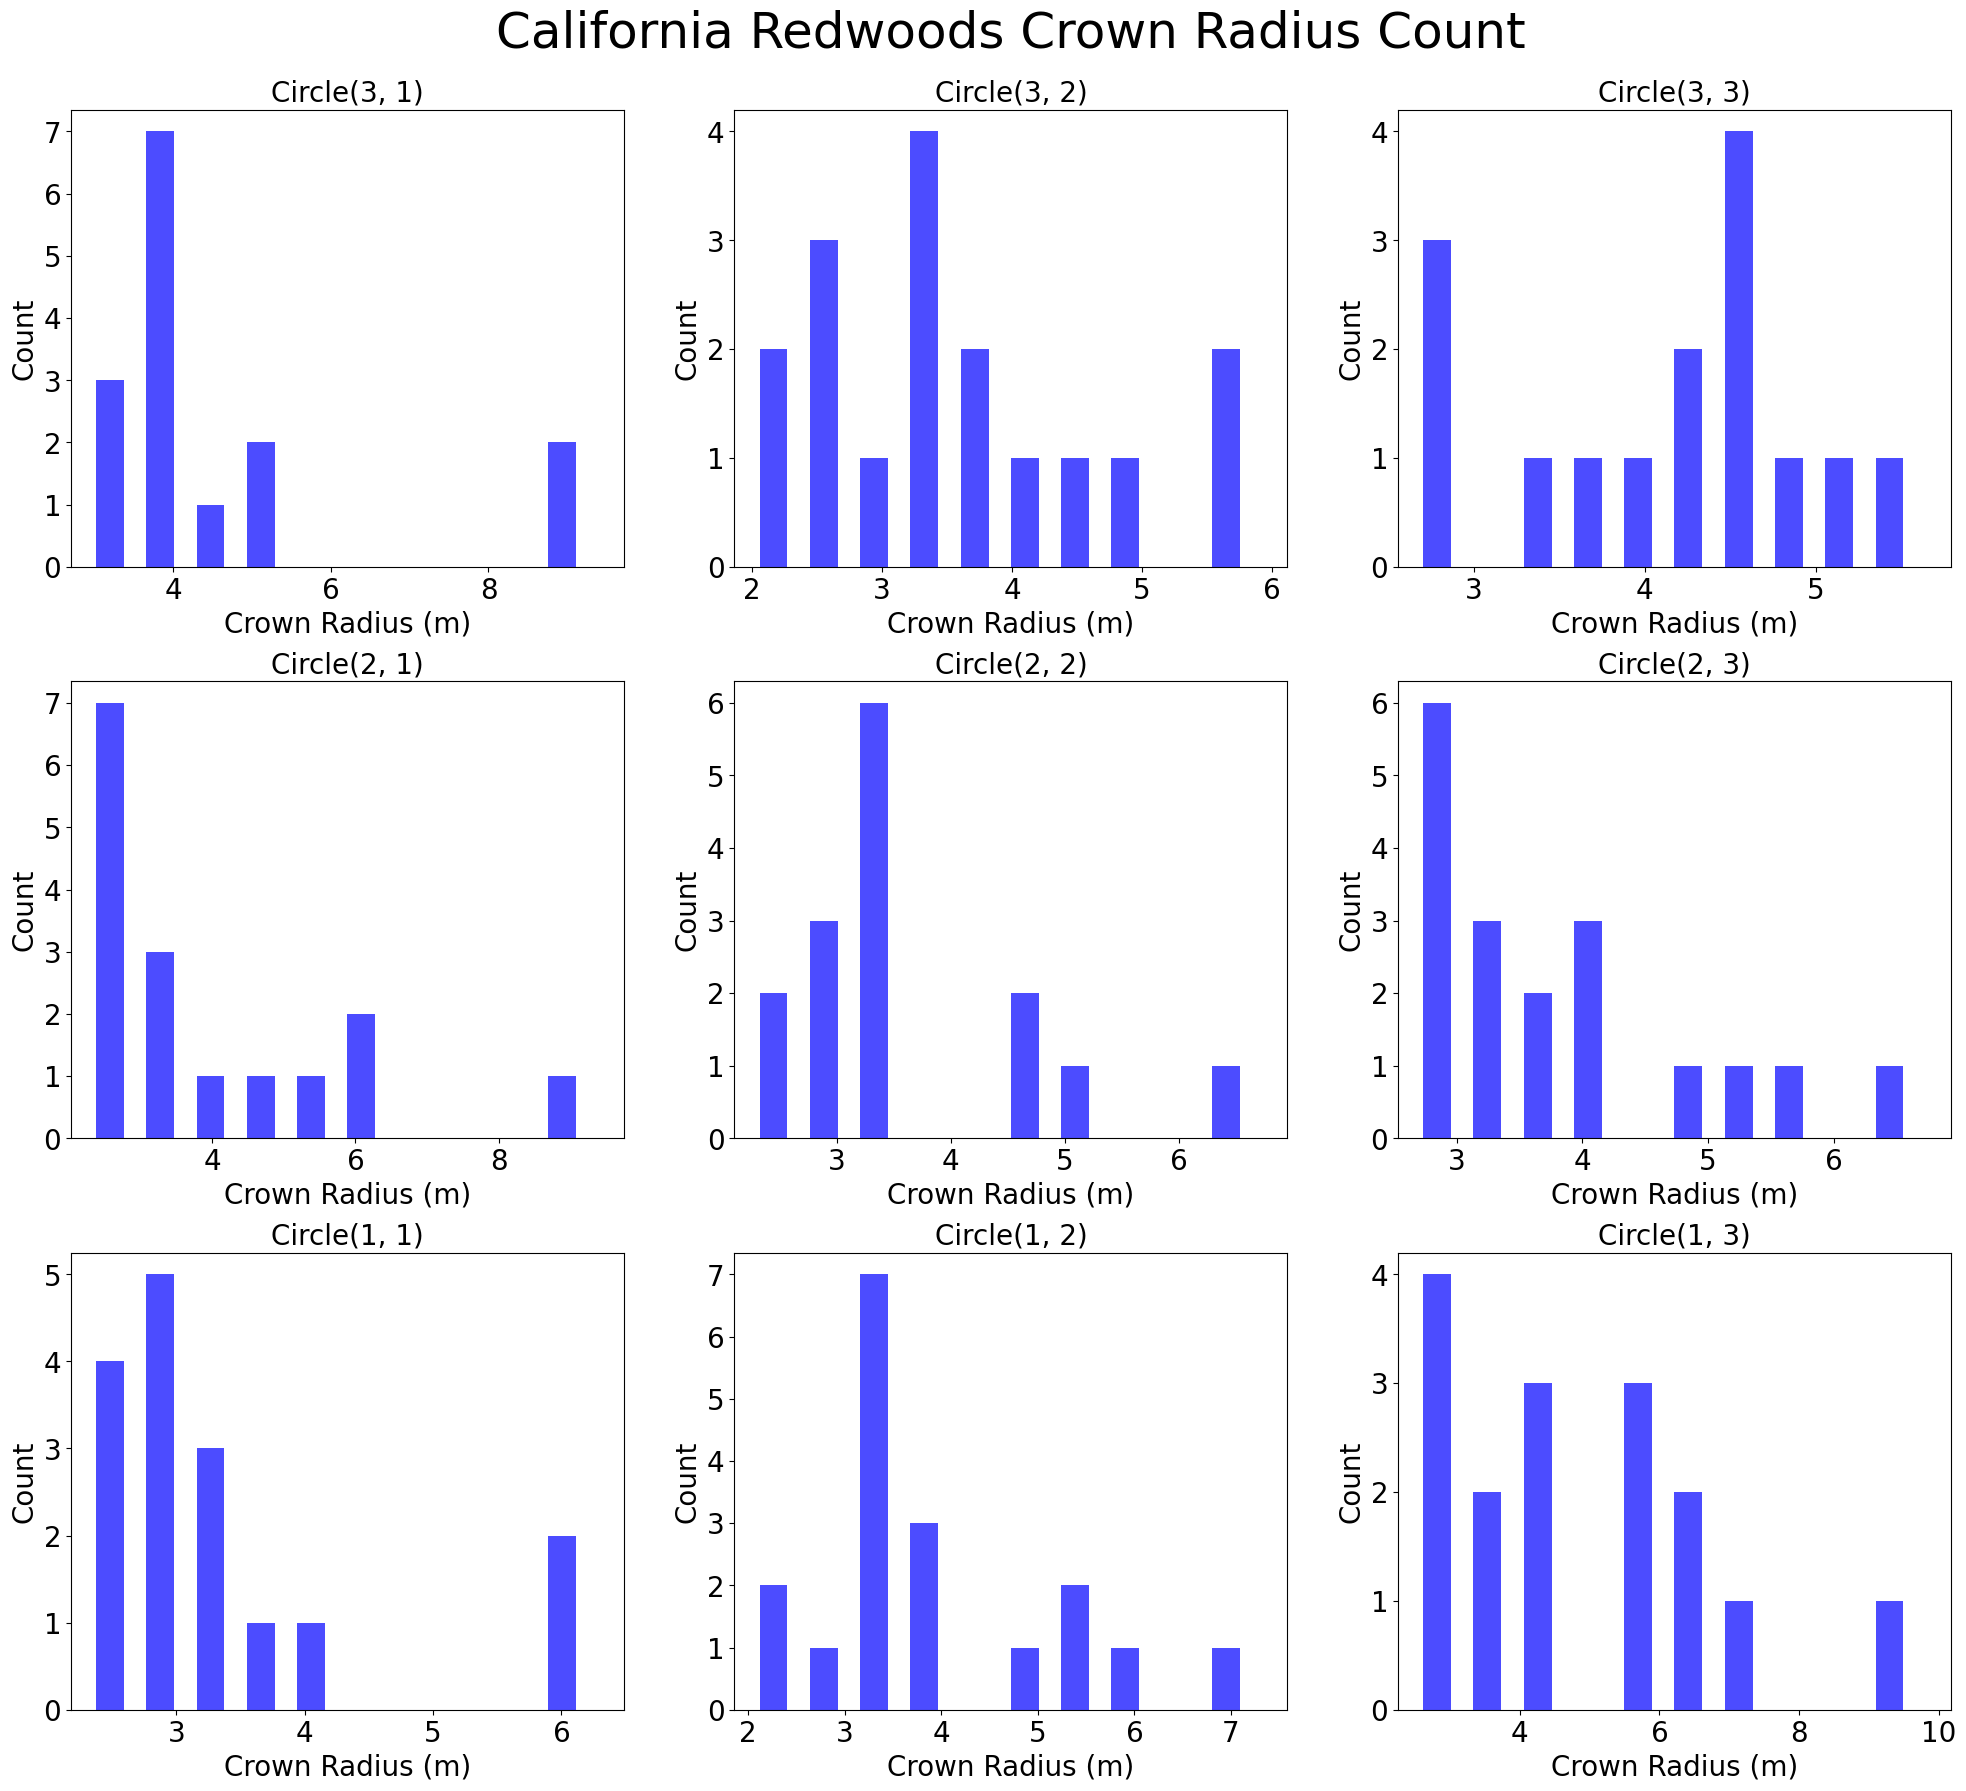

Circle Circle(3, 1) has trees with heights over 25m: [25.94412, 26.03559, 41.678149999999995, 29.039830000000002, 29.2986, 42.180749999999996, 25.44789]
Circle Circle(3, 2) has trees with heights over 25m: [32.31669, 33.1145, 30.38947, 27.58894, 26.734230000000004]
Circle Circle(3, 3) has trees with heights over 25m: [26.958490000000005, 30.38947, 26.734230000000004, 27.53051, 28.19755, 27.07965, 26.15139, 25.25244, 29.42302, 31.59196]
Circle Circle(2, 1) has trees with heights over 25m: [32.66945, 41.678149999999995, 29.2986, 34.7697, 30.75101]
Circle Circle(2, 2) has trees with heights over 25m: [27.58894, 35.1838, 28.249670000000002, 29.44043]
Circle Circle(2, 3) has trees with heights over 25m: [35.1838, 28.249670000000002, 25.25244, 29.44043, 26.8958, 31.5445]
Circle Circle(1, 1) has trees with heights over 25m: [35.0937, 34.43585]
Circle Circle(1, 2) has trees with heights over 25m: [33.39685, 30.95908, 25.26886, 29.66155, 37.634100000000004, 29.64743]
Circle Circle(1, 3) has tre

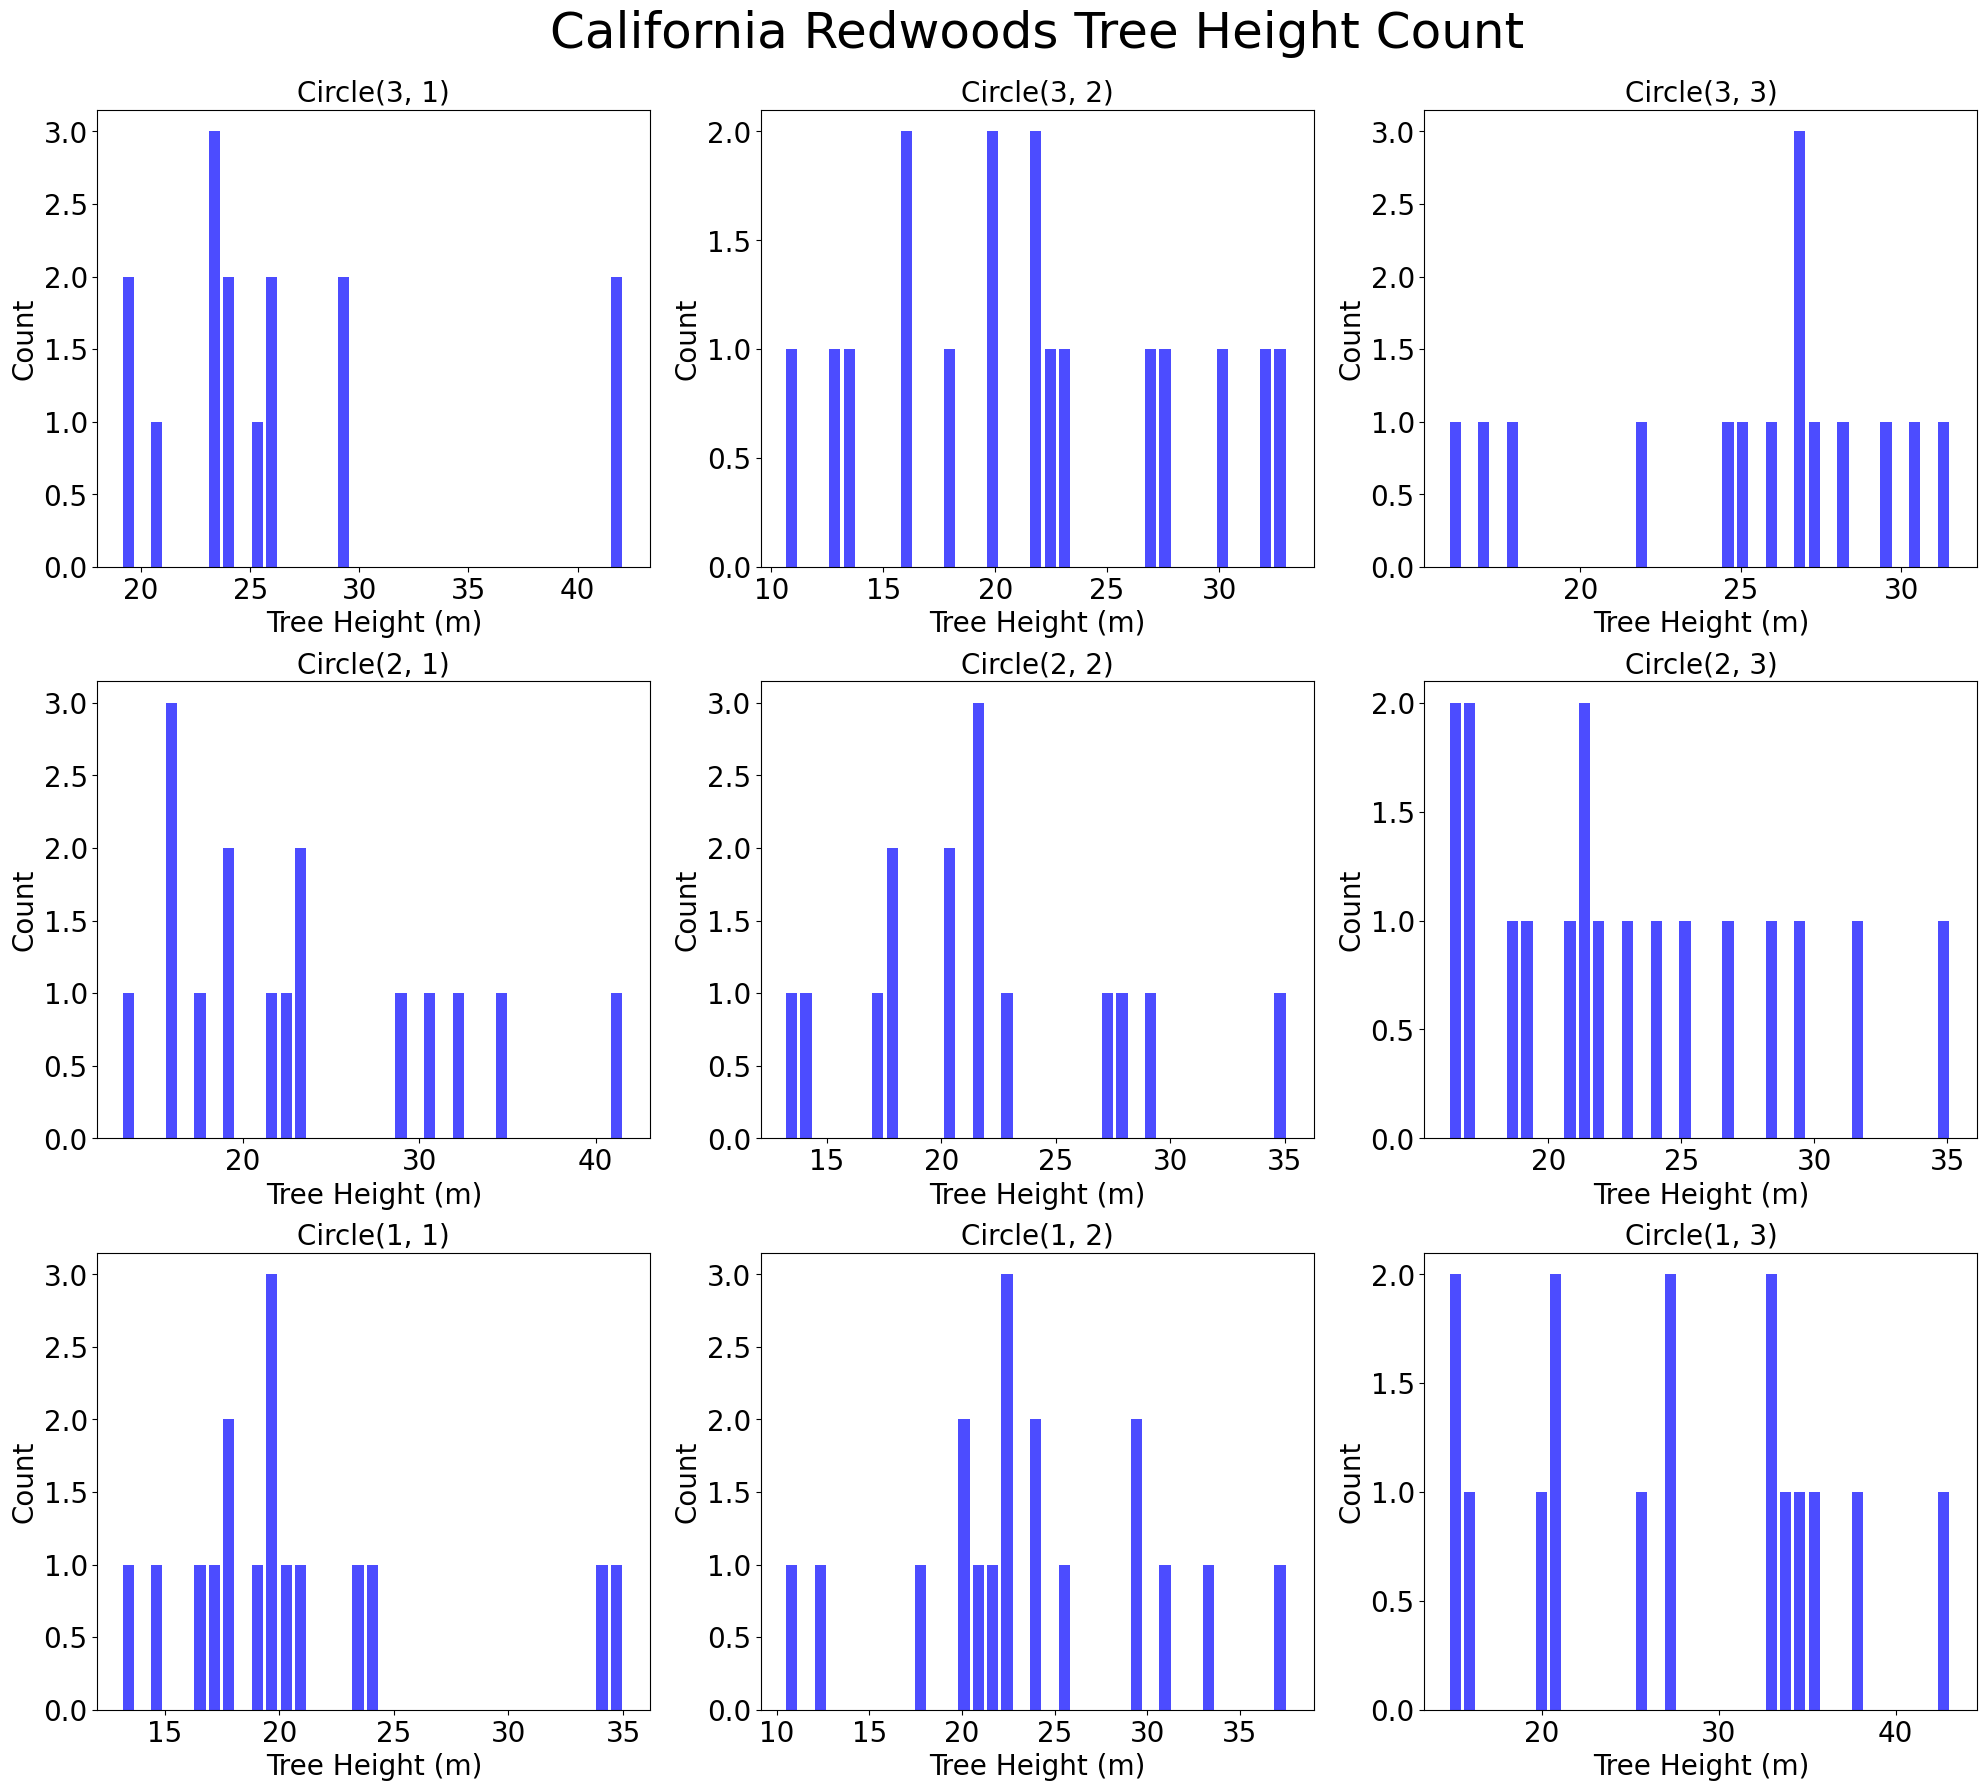

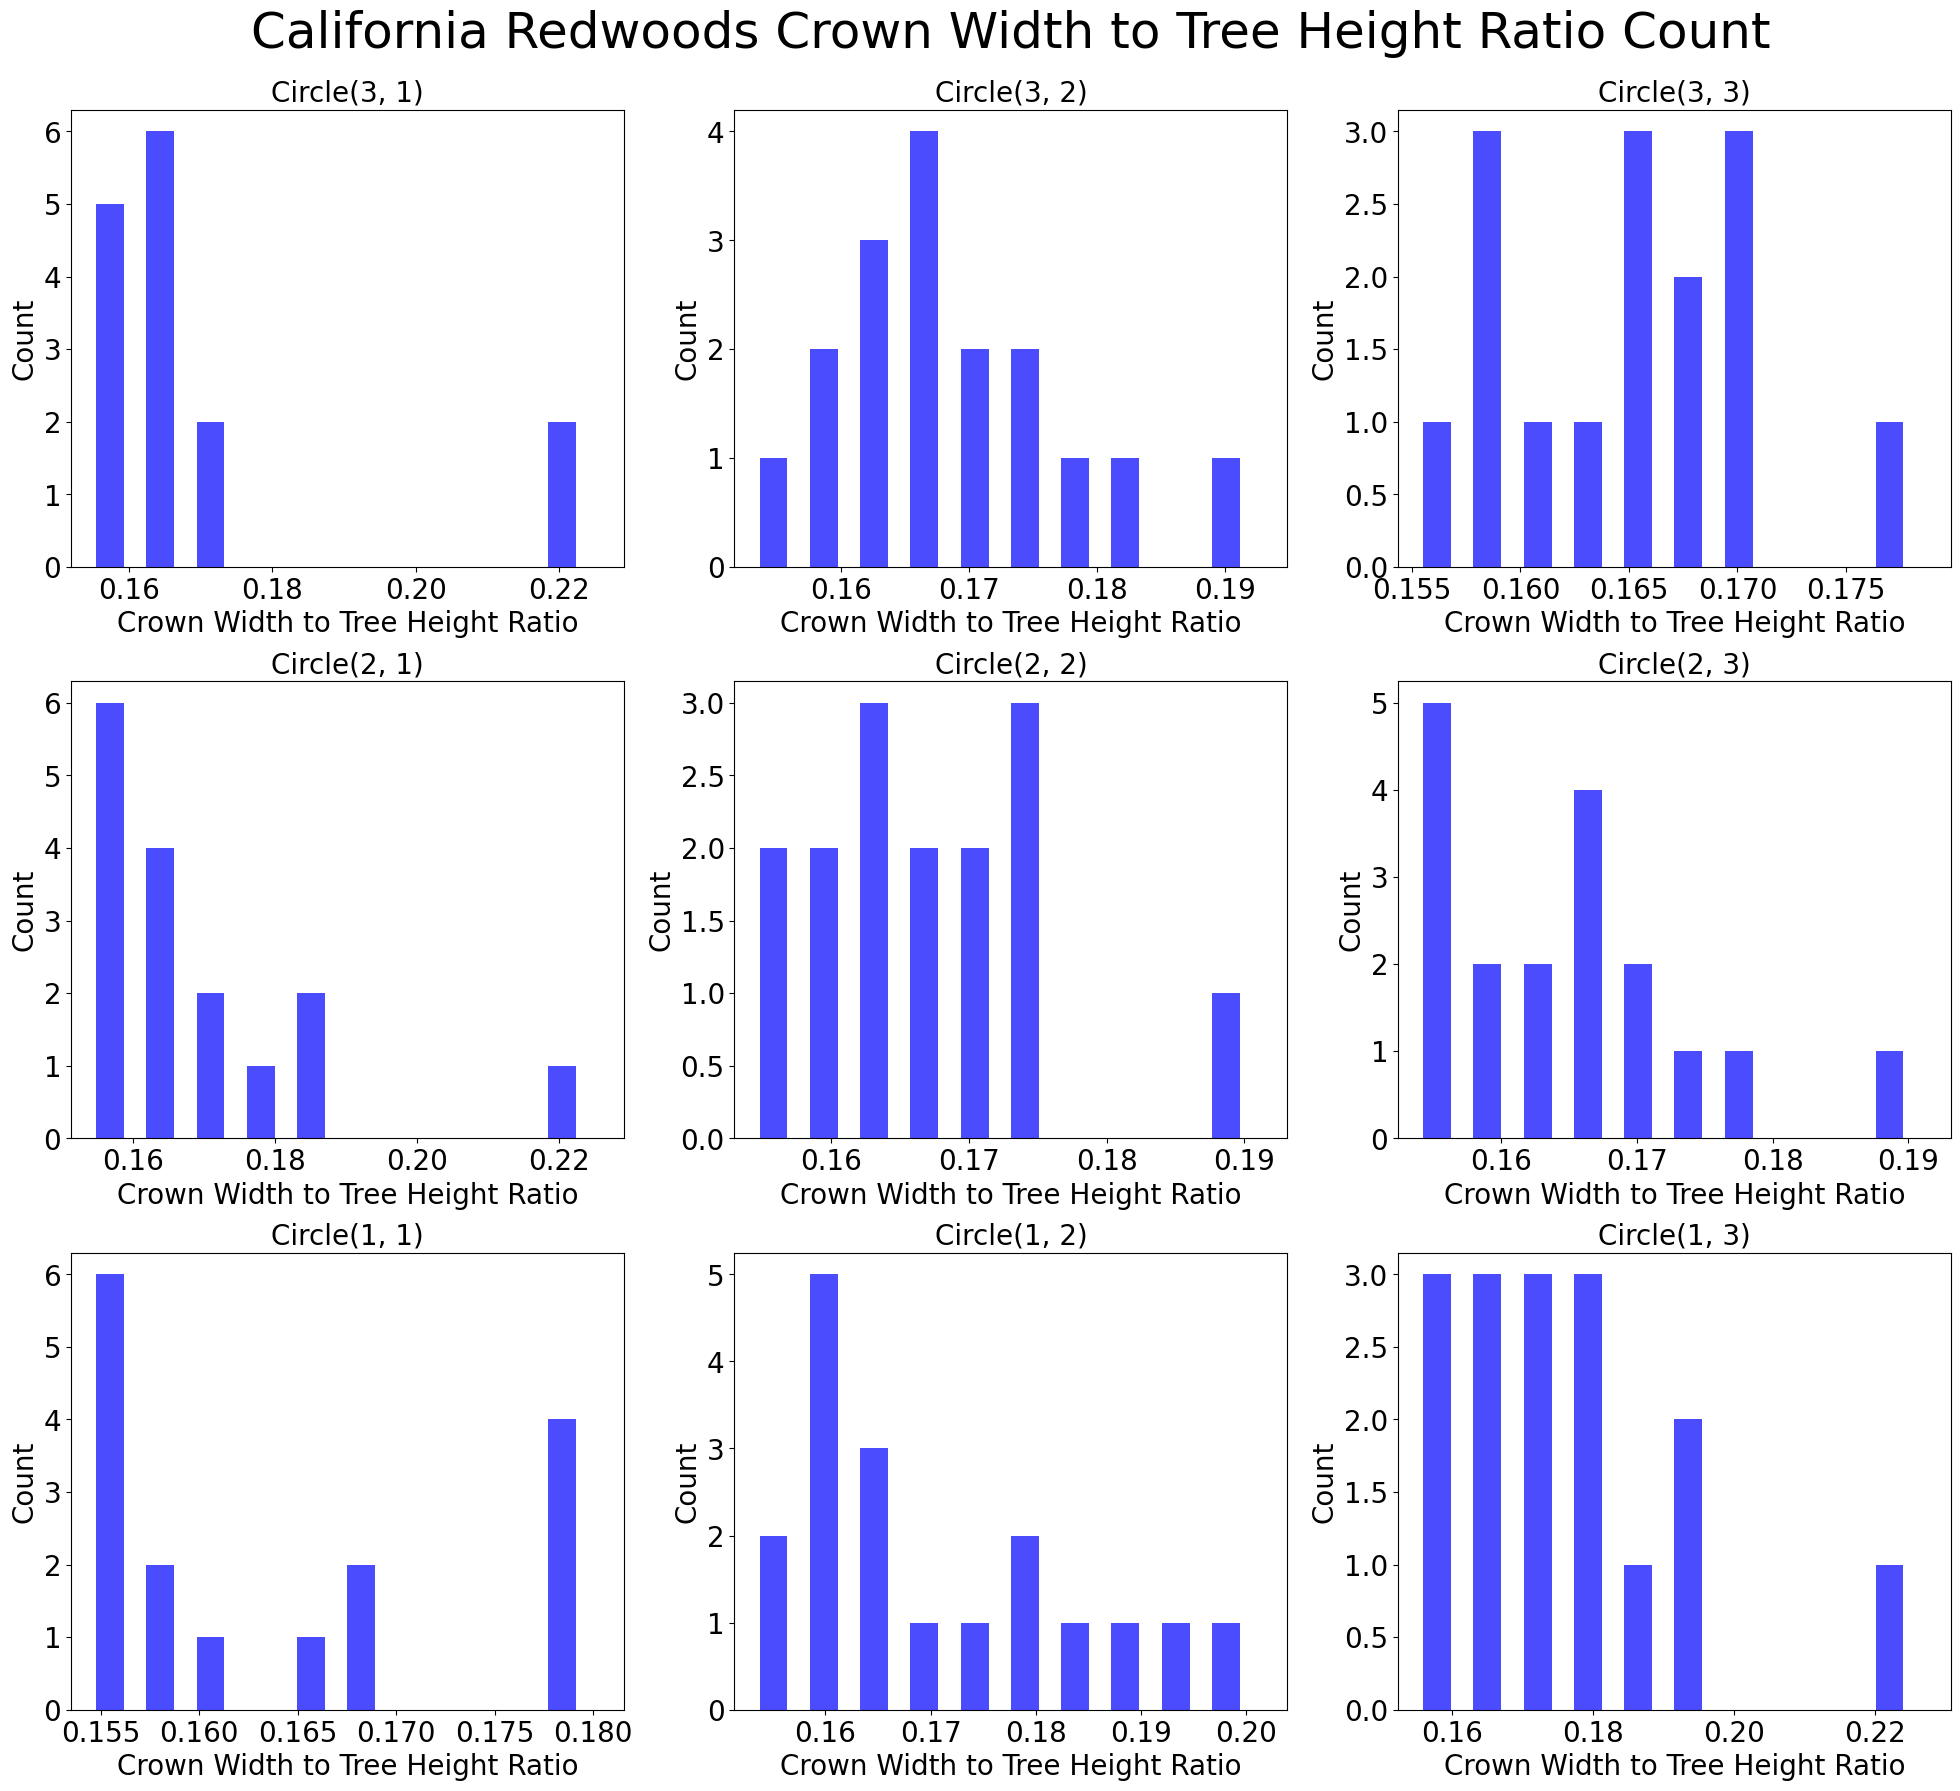

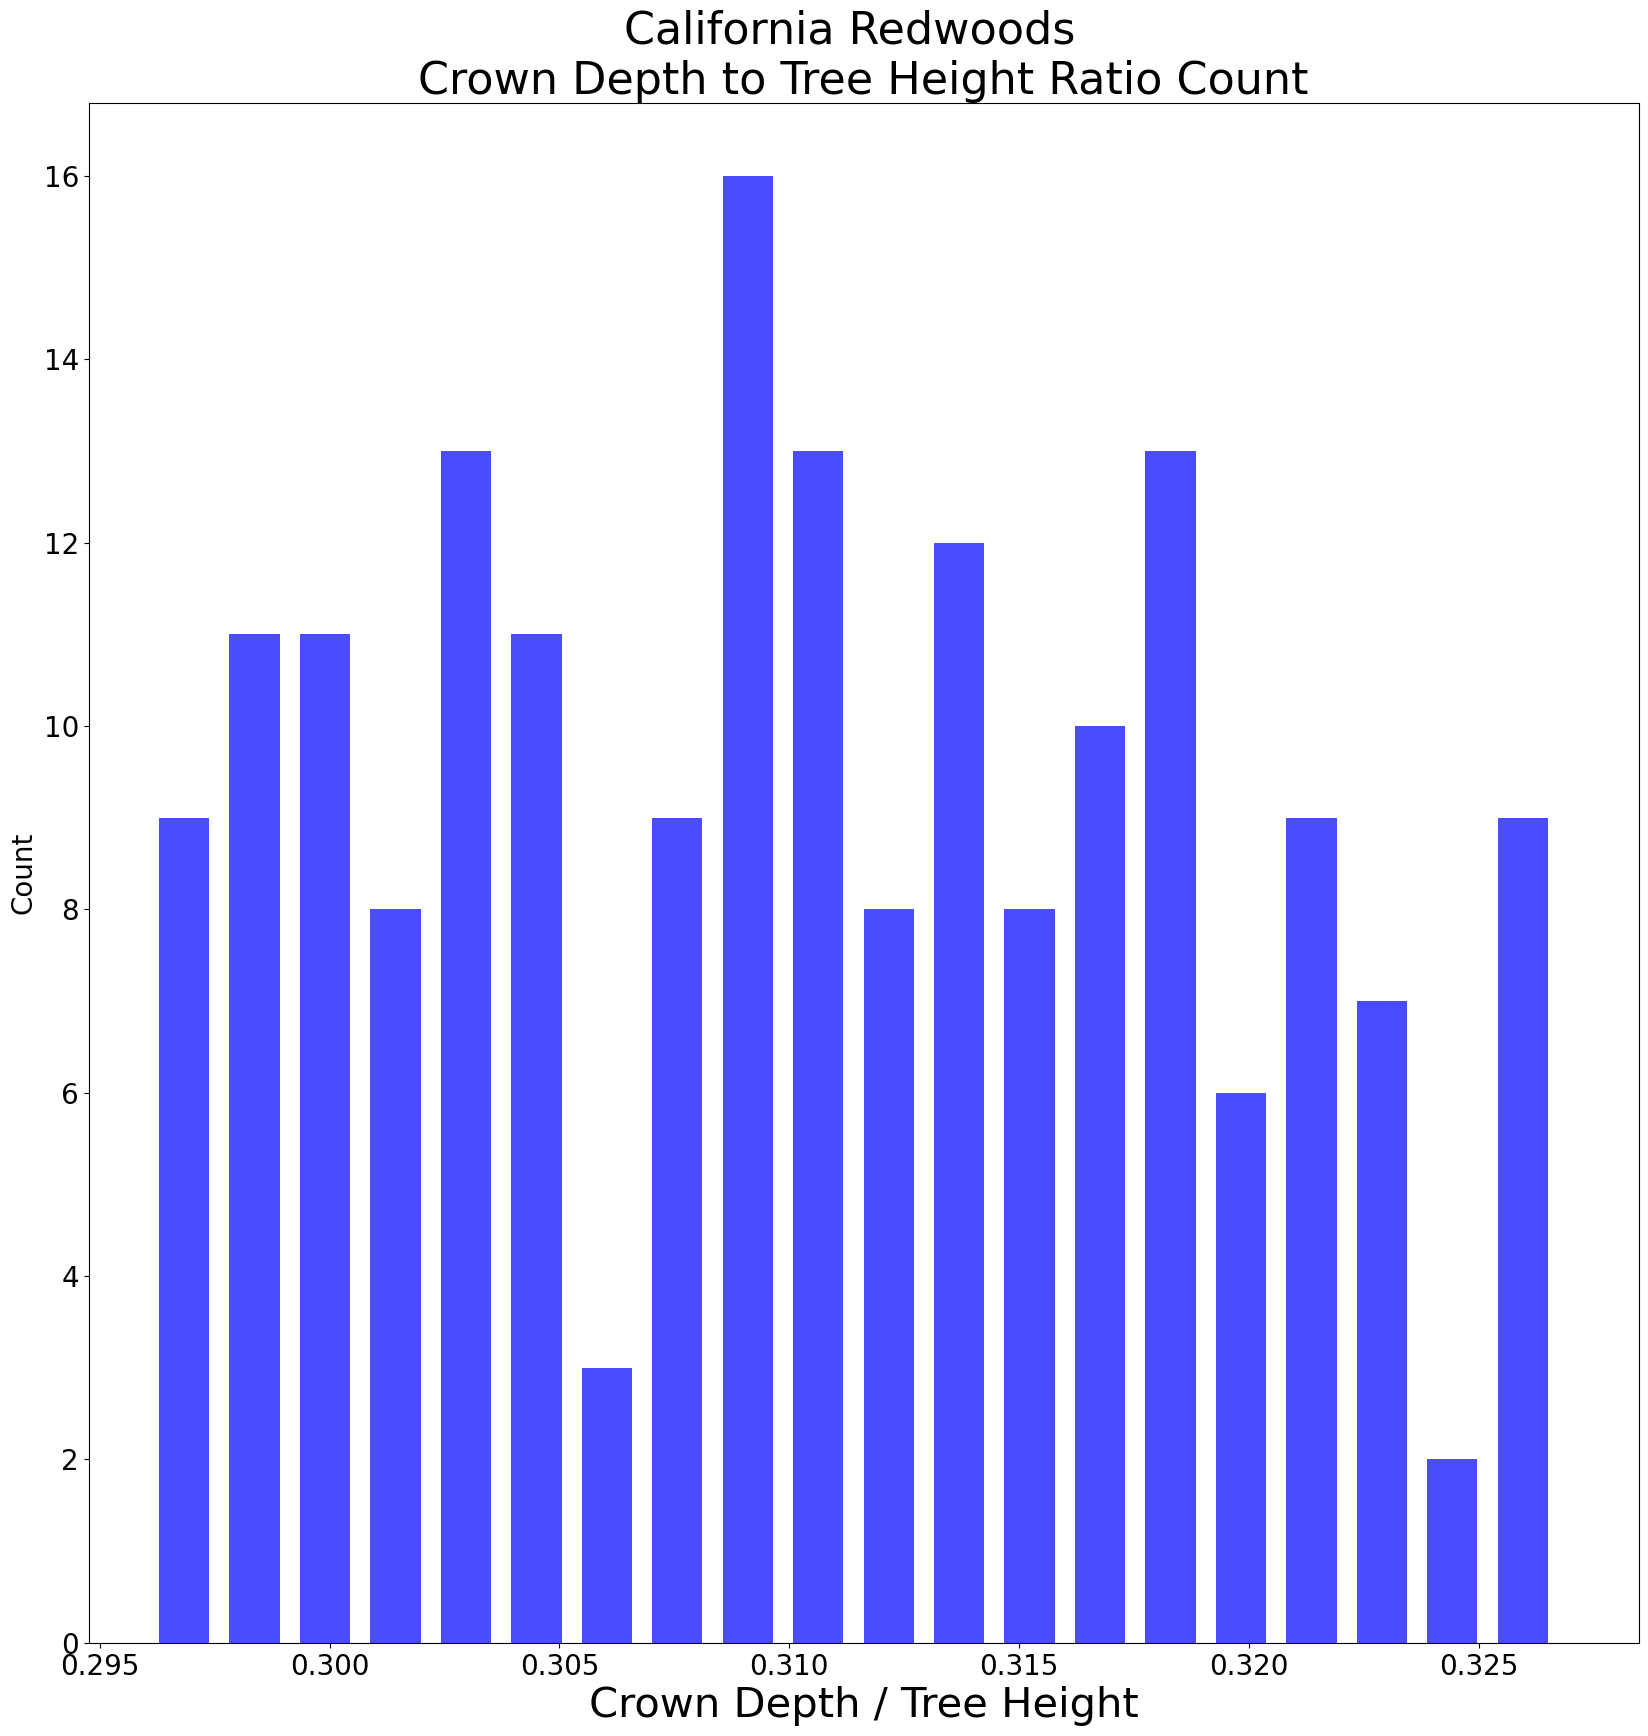

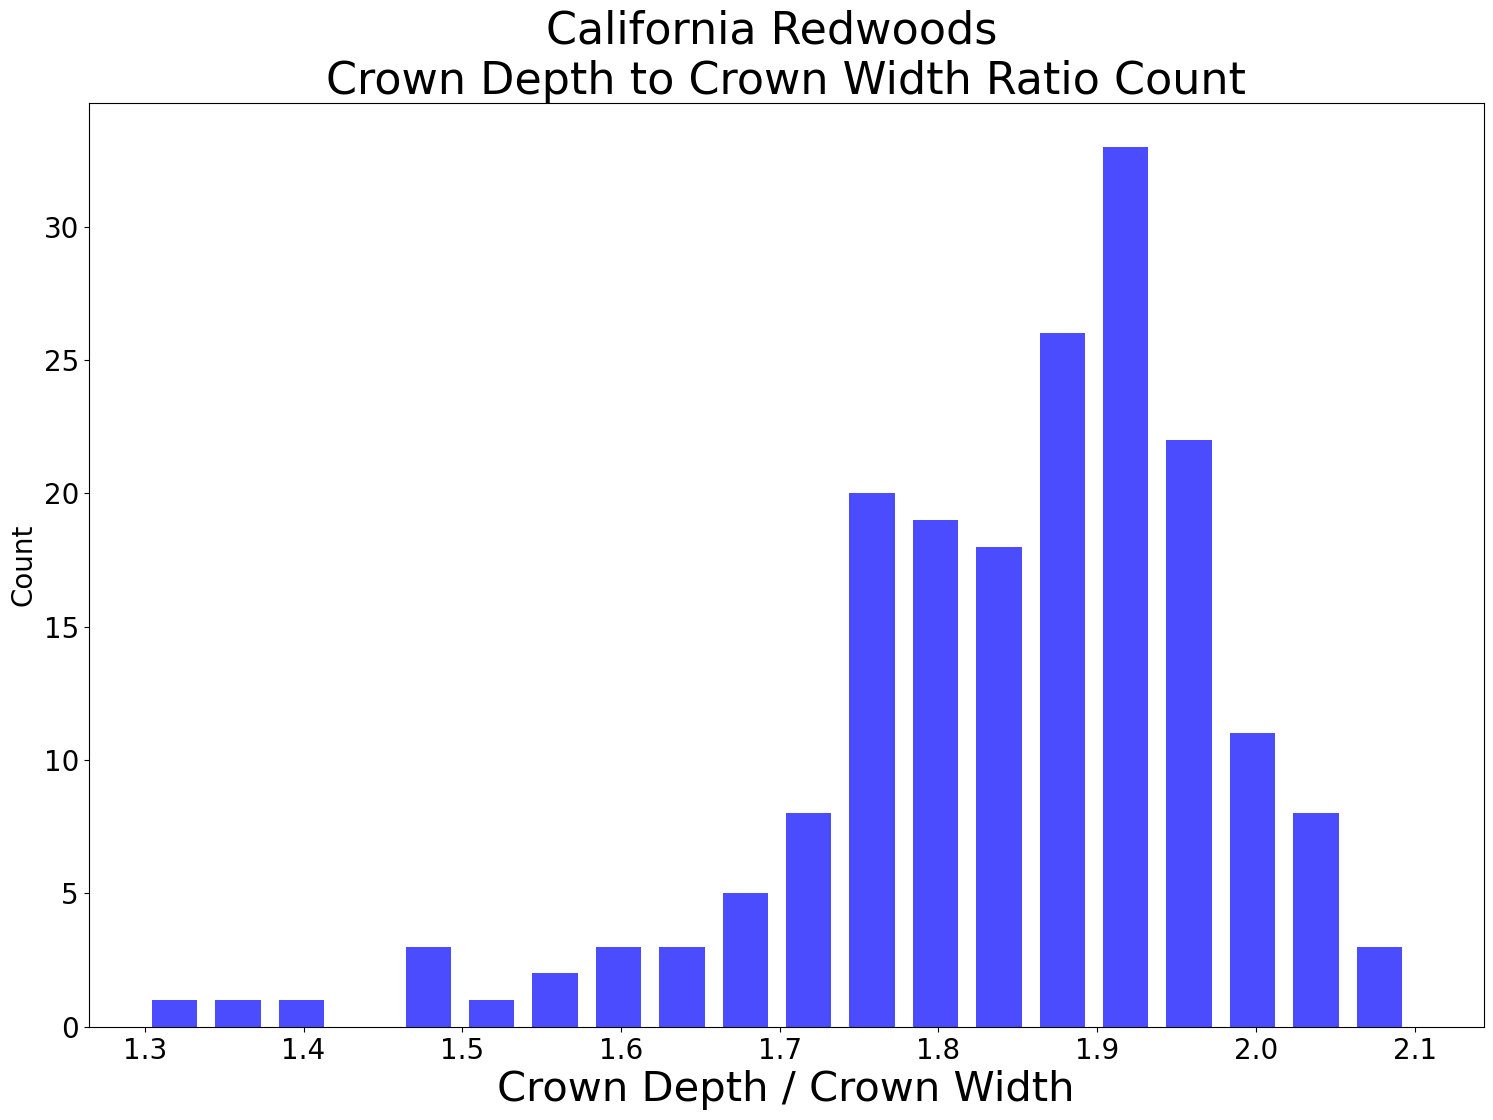

In [9]:
plot_crown_radius_count(redwood_tree_objects_branch_orig, redwood_circle_objects_orig, redwood_output_file_path, "redwood_crown_radius_count.png", "California Redwoods")
plot_tree_height_count(redwood_tree_objects_branch_orig, redwood_circle_objects_orig, redwood_output_file_path, "redwood_tree_height_count.png", "California Redwoods")
plot_crown_width_tree_height_ratio_count(redwood_tree_objects_branch_orig, redwood_circle_objects_orig, redwood_output_file_path, "redwood_cr_width_tree_h_ratio_count.png", "California Redwoods")
plot_crown_depth_tree_height_ratio_count(redwood_tree_objects_branch_orig, redwood_output_file_path, "redwood_cr_depth_tree_h_ratio_count.png", "California Redwoods")
plot_crown_depth_crown_width_ratio_count(redwood_tree_objects_branch_orig, redwood_output_file_path, "redwood_cr_depth_cr_width_ratio_metrics.png", "California Redwoods")

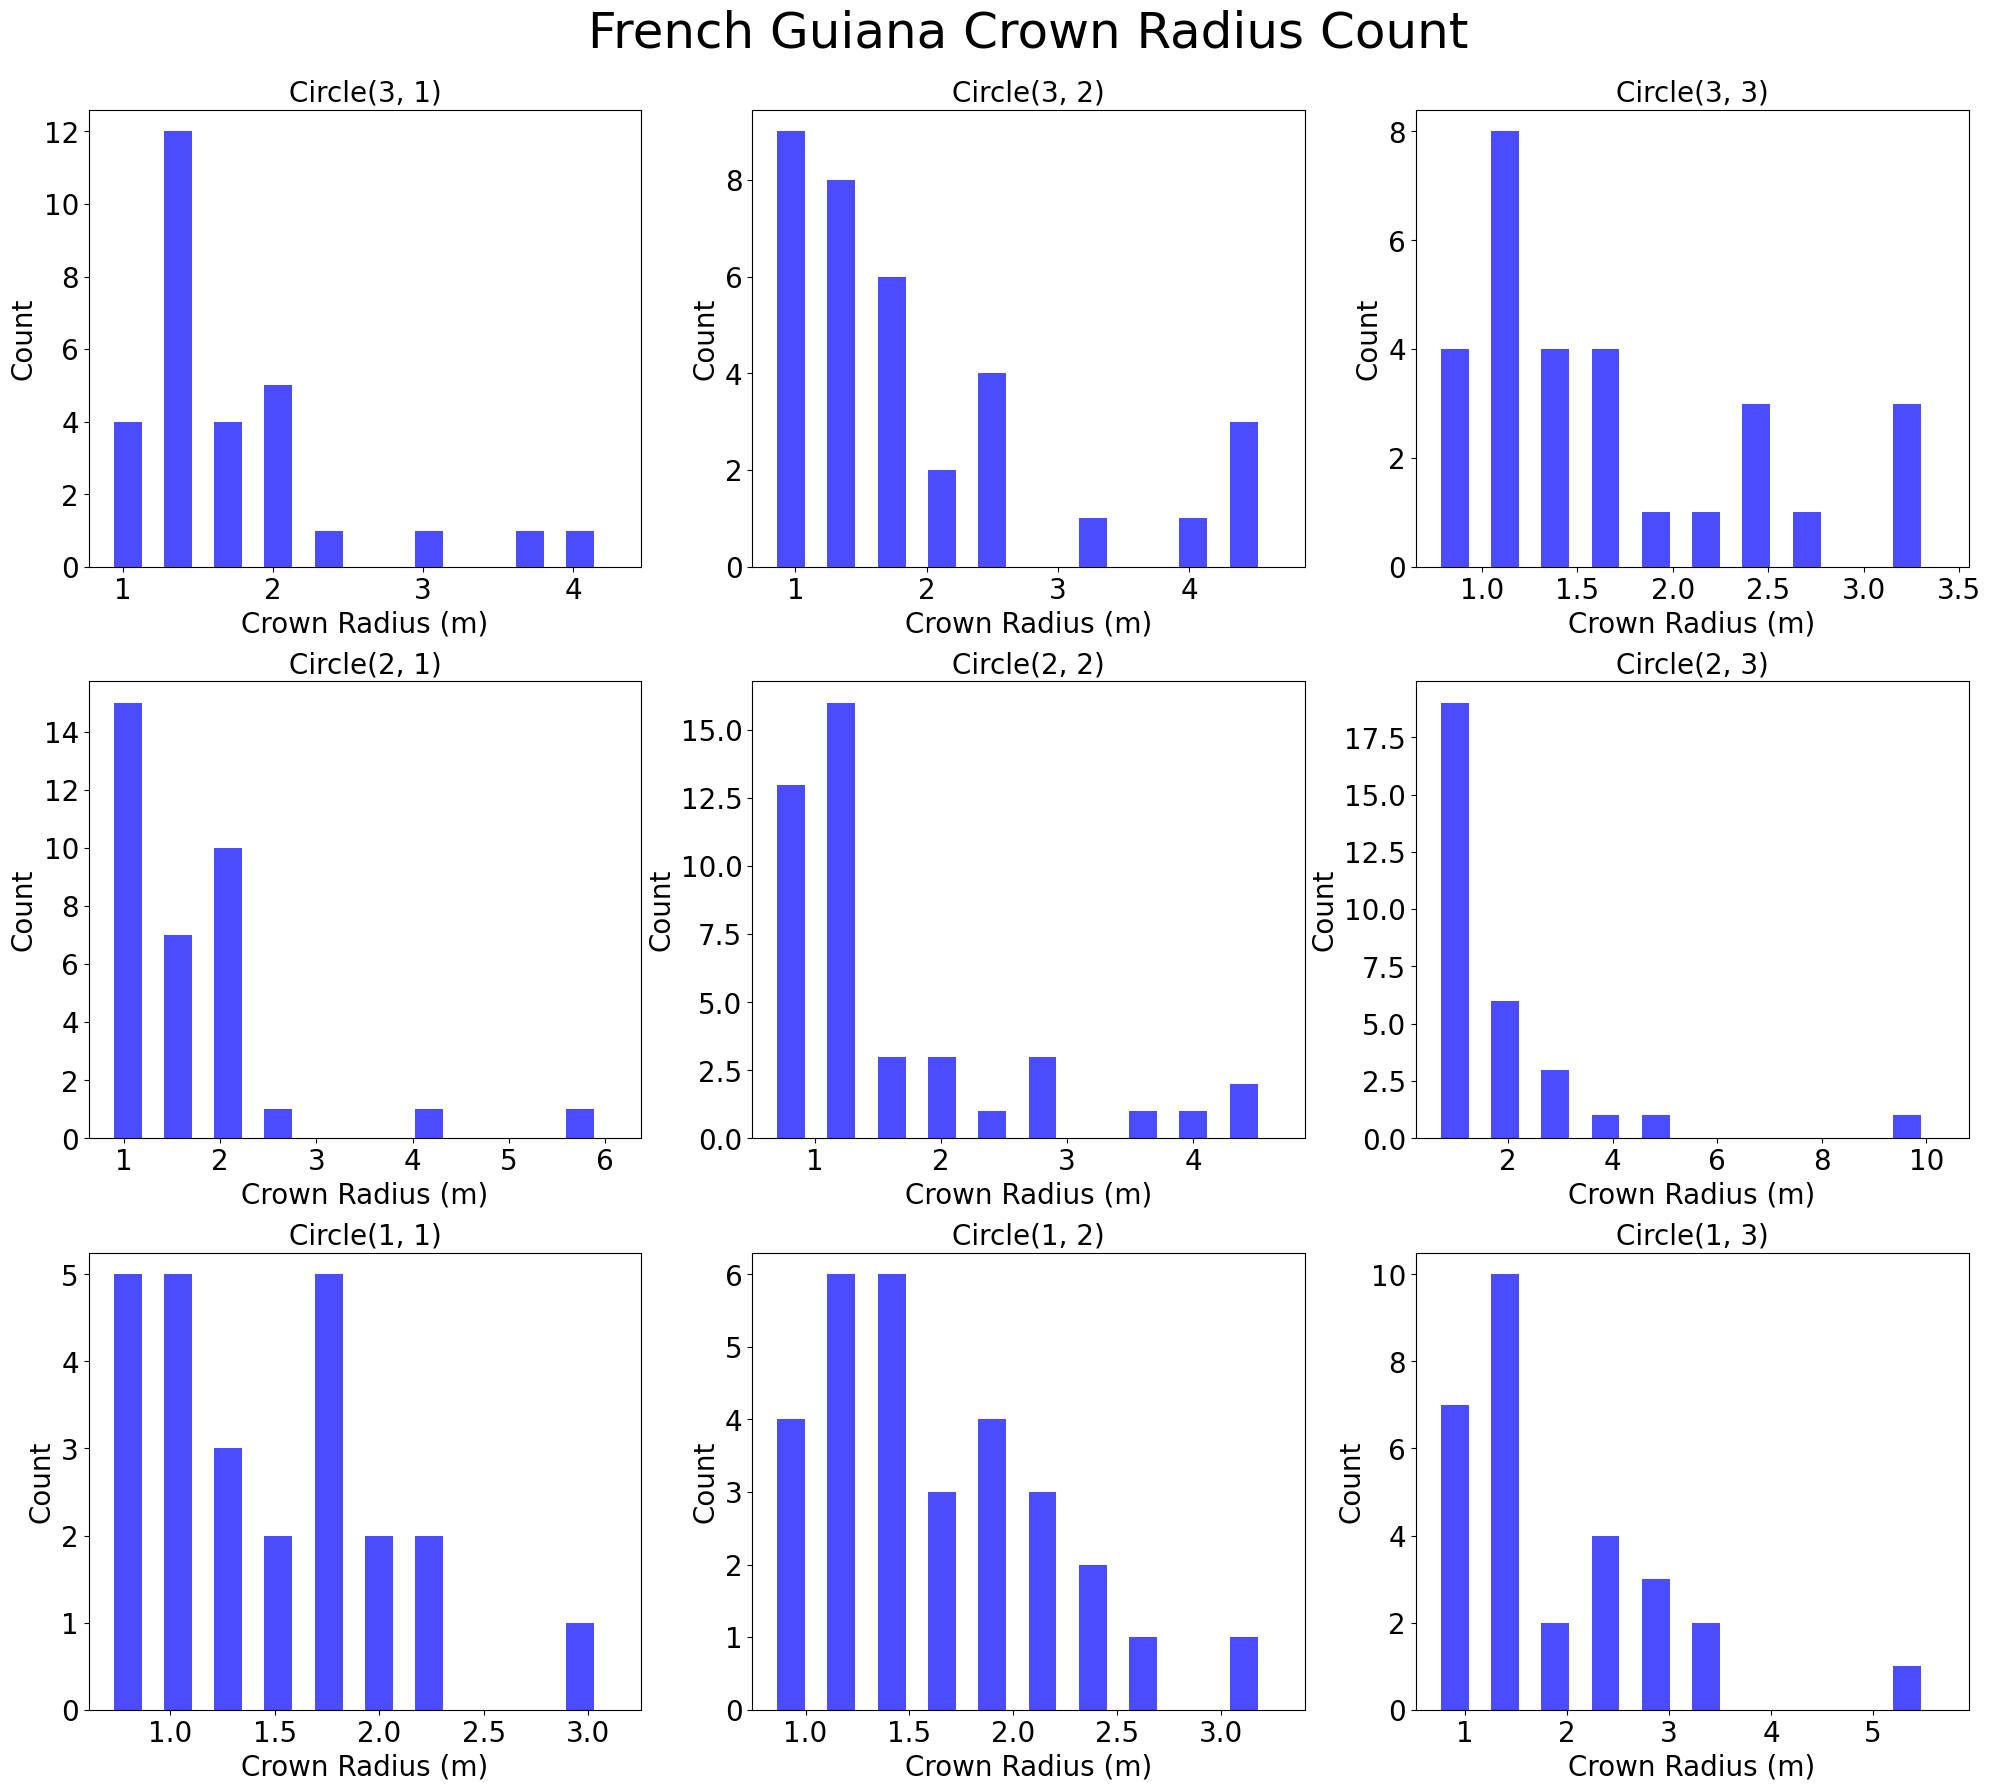

Circle Circle(3, 1) has trees with heights over 25m: [29.933690000000002, 26.037664999999997, 28.27196]
Circle Circle(3, 2) has trees with heights over 25m: [27.593359999999997, 30.75644, 28.93177, 30.16569, 30.02147]
Circle Circle(3, 3) has trees with heights over 25m: [26.278370000000002, 27.445570000000004, 27.39513]
Circle Circle(2, 1) has trees with heights over 25m: [33.57793, 29.21494]
Circle Circle(2, 2) has trees with heights over 25m: [30.75644, 28.17346, 26.04265, 29.522859999999998, 30.02147]
Circle Circle(2, 3) has trees with heights over 25m: [27.581020000000002, 30.620730000000002, 27.23454, 39.32025, 25.57394]
Circle Circle(1, 1) has trees with heights over 25m: [26.42274]
Circle Circle(1, 2) has trees with heights over 25m: [27.121740000000003]
Circle Circle(1, 3) has trees with heights over 25m: [25.246495, 27.121740000000003, 27.581020000000002, 33.12692, 25.14036]


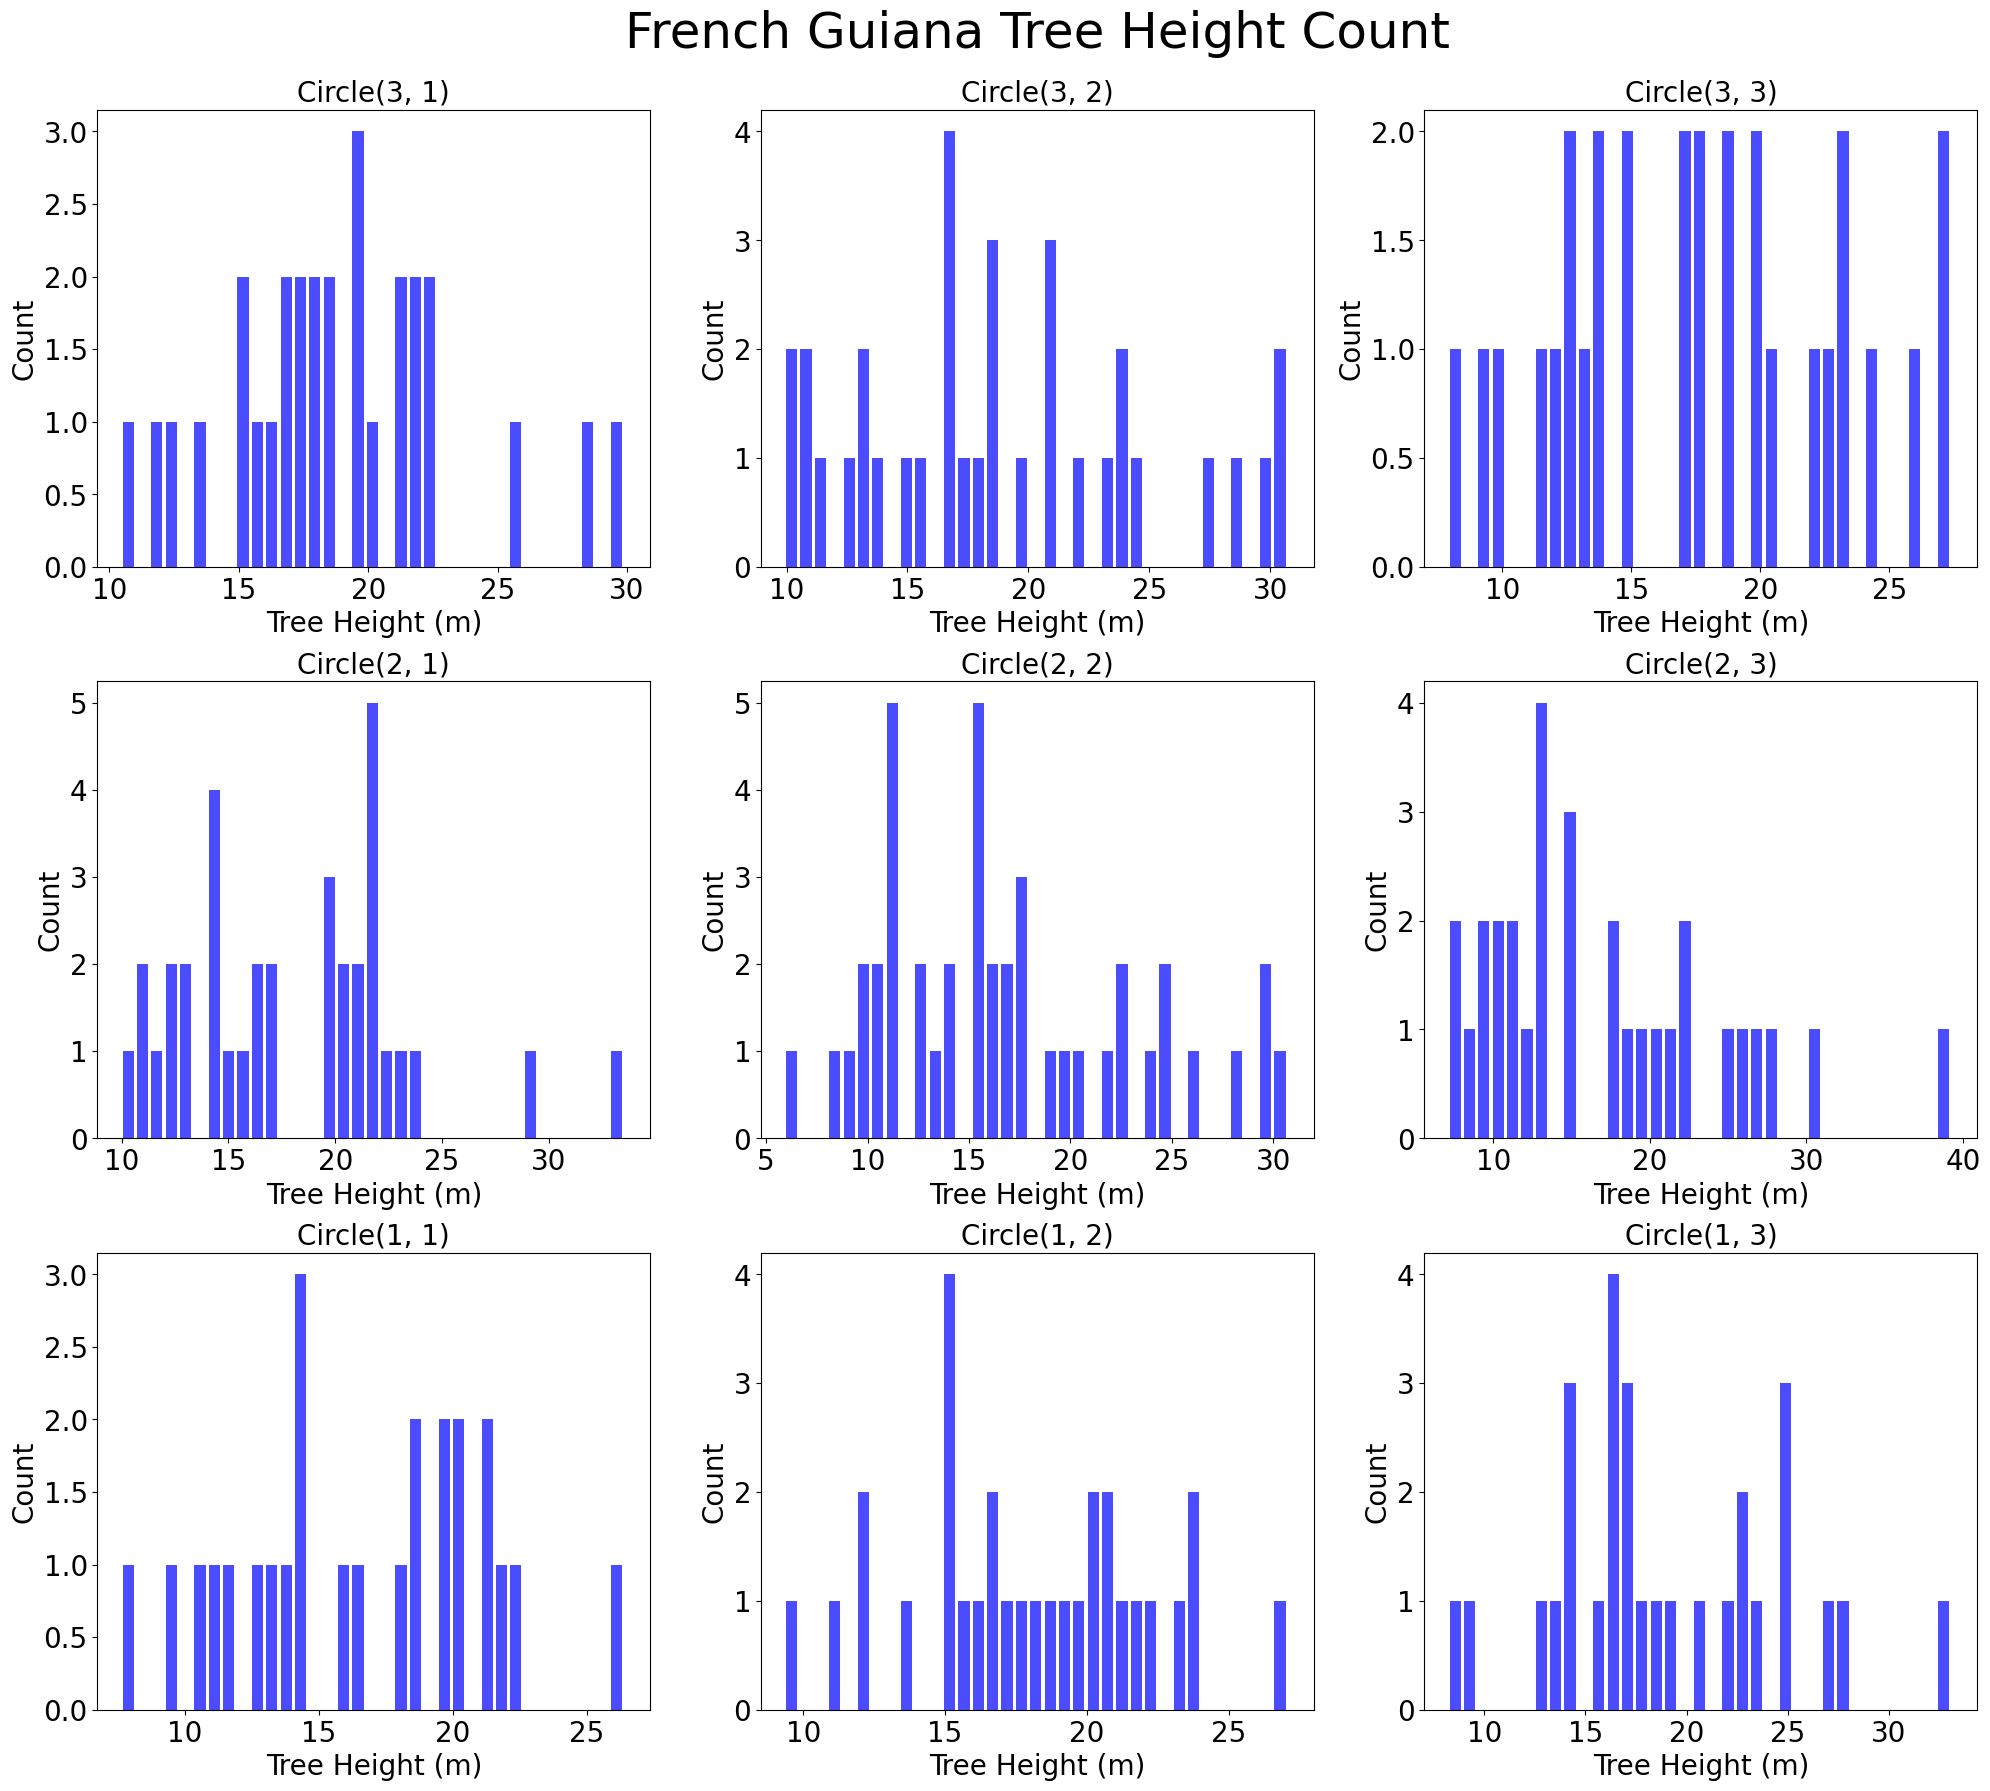

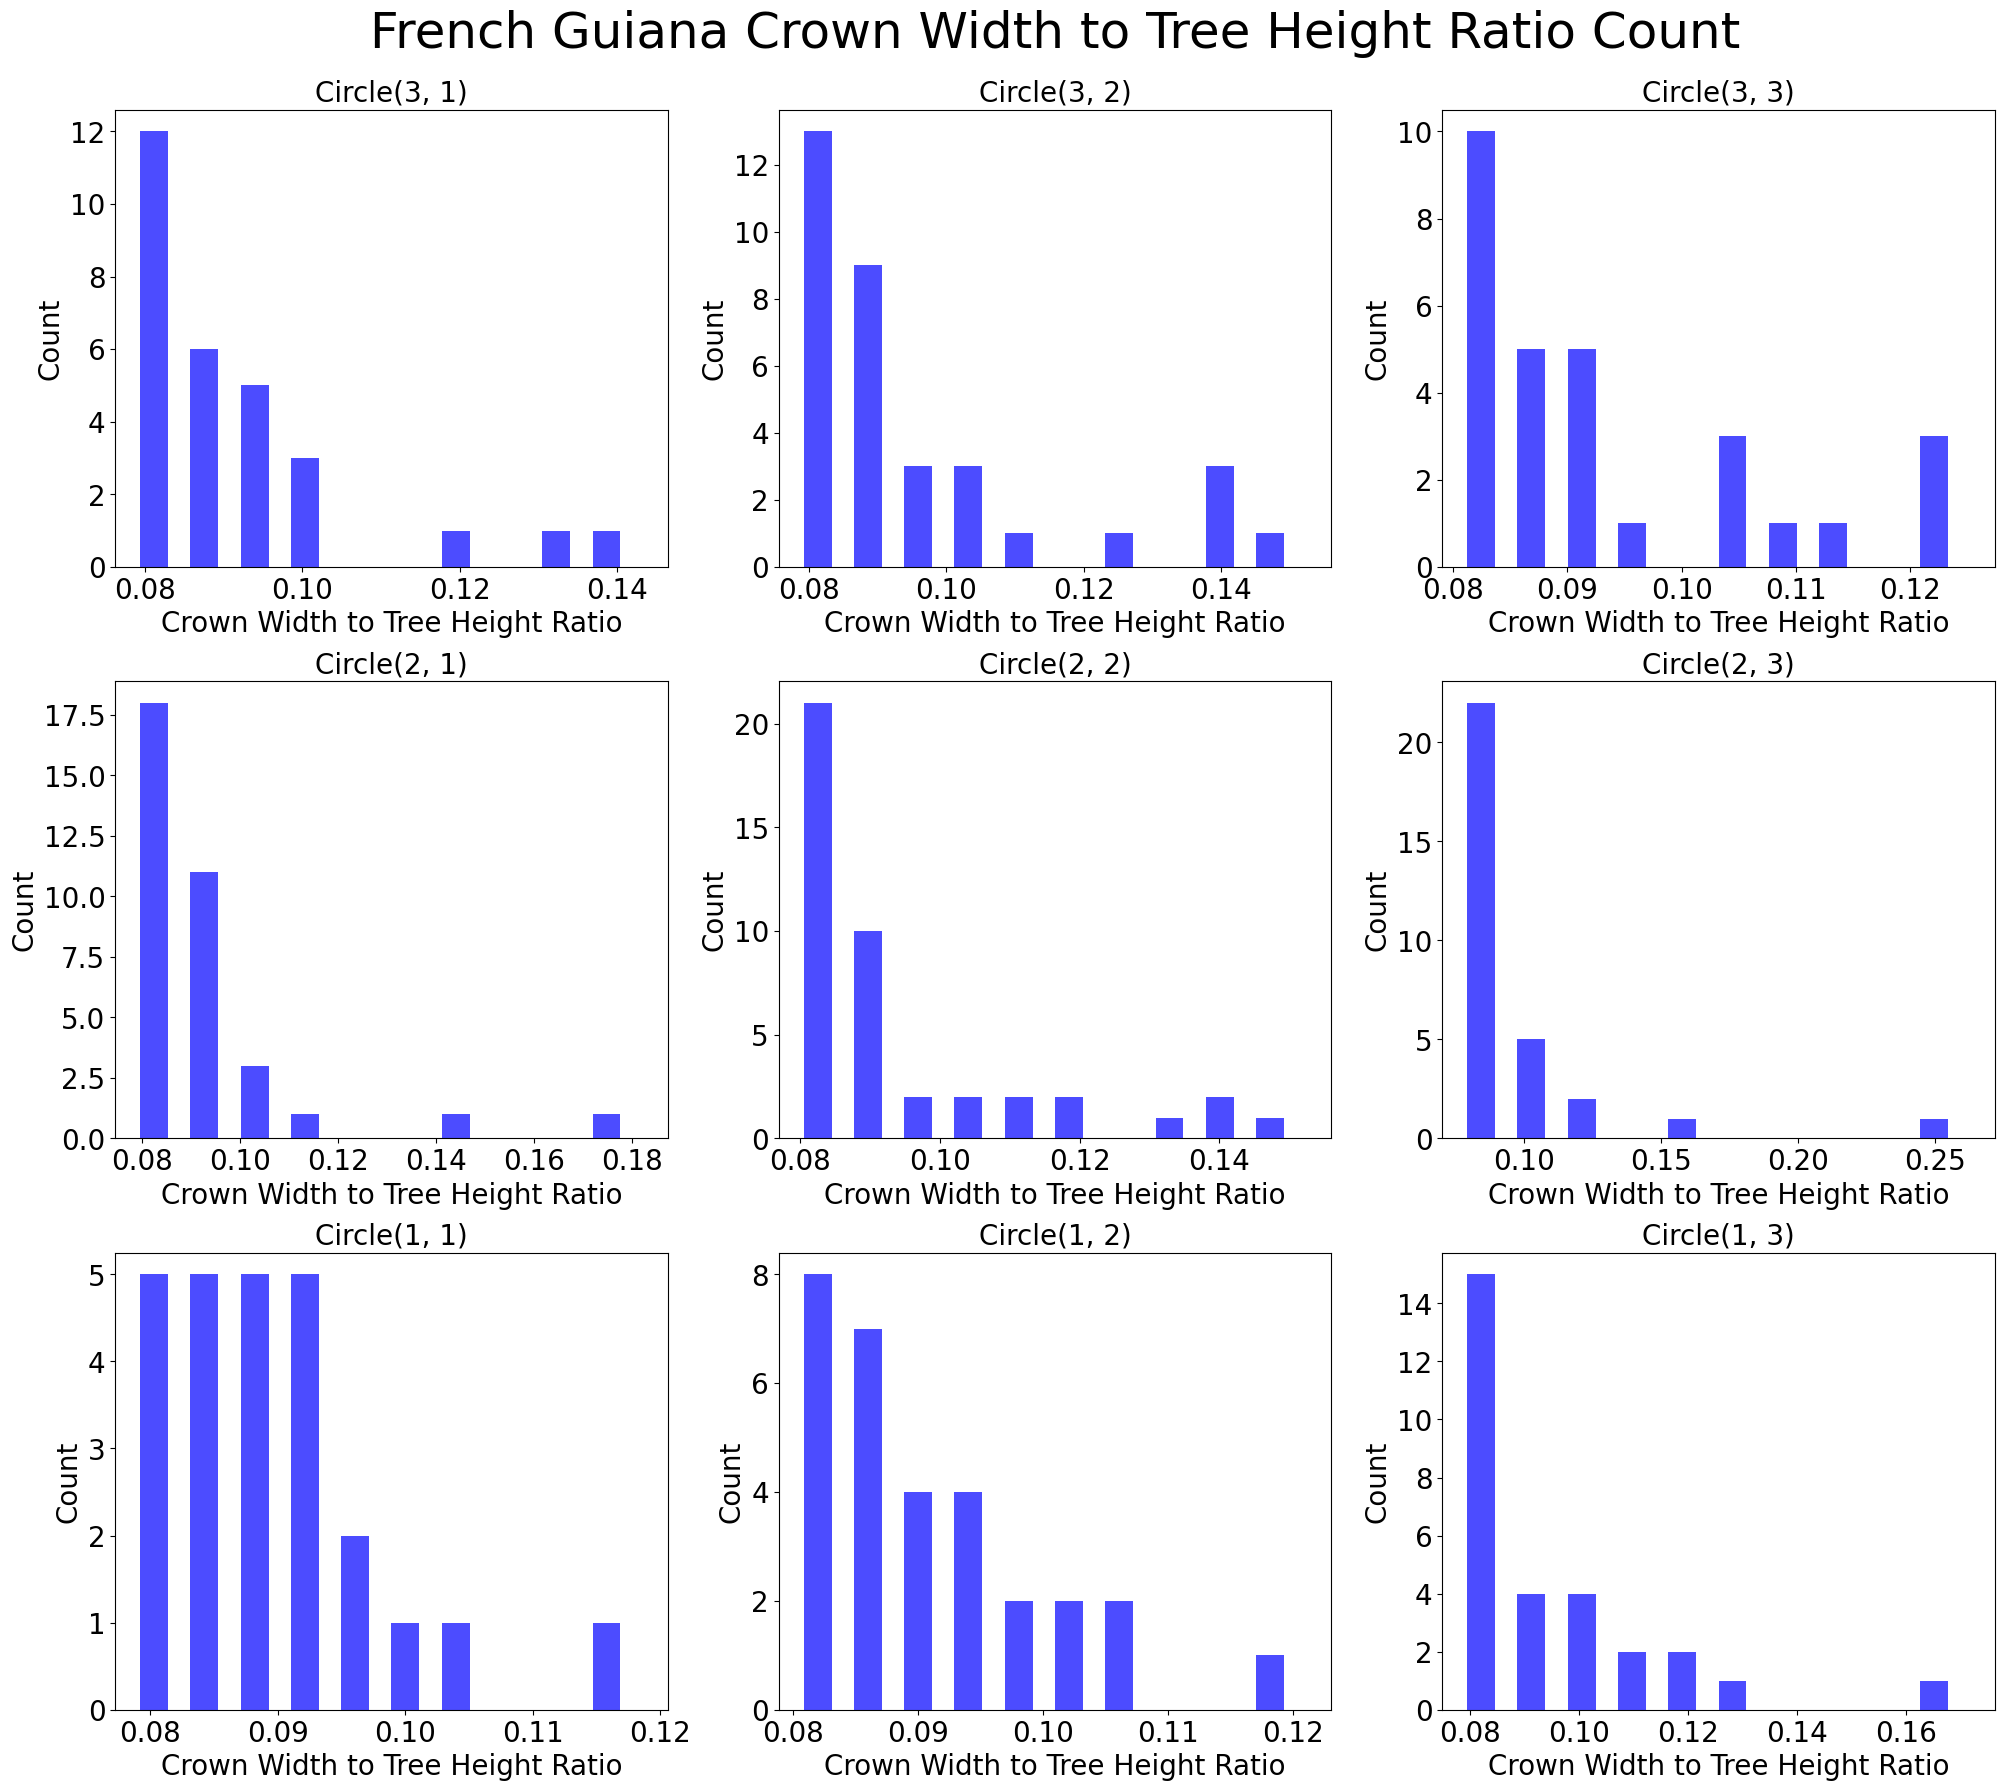

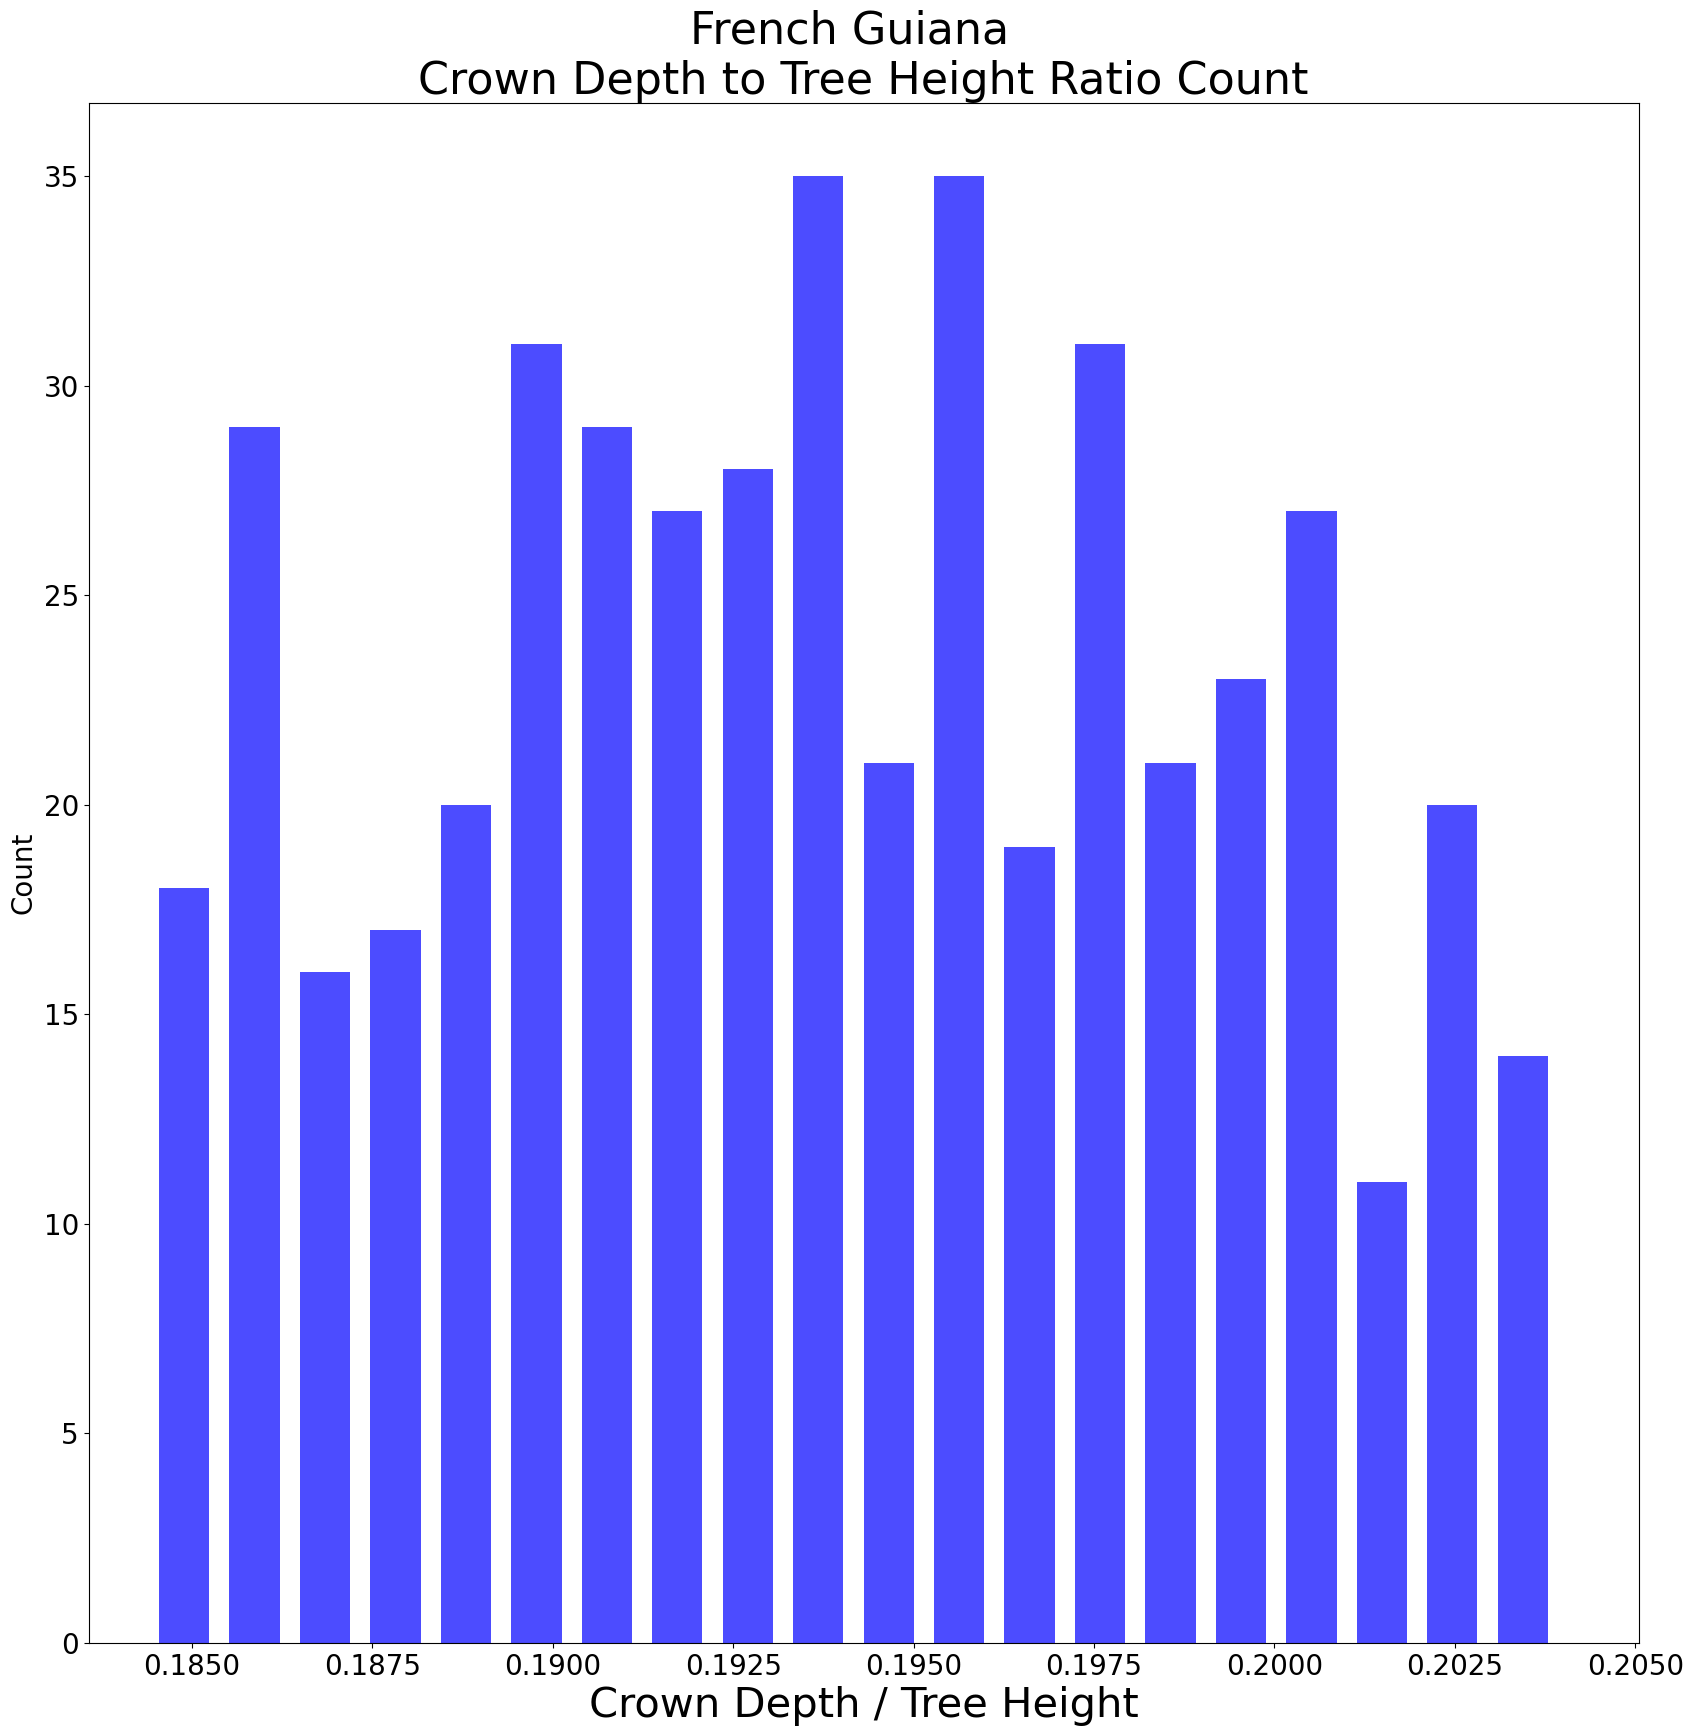

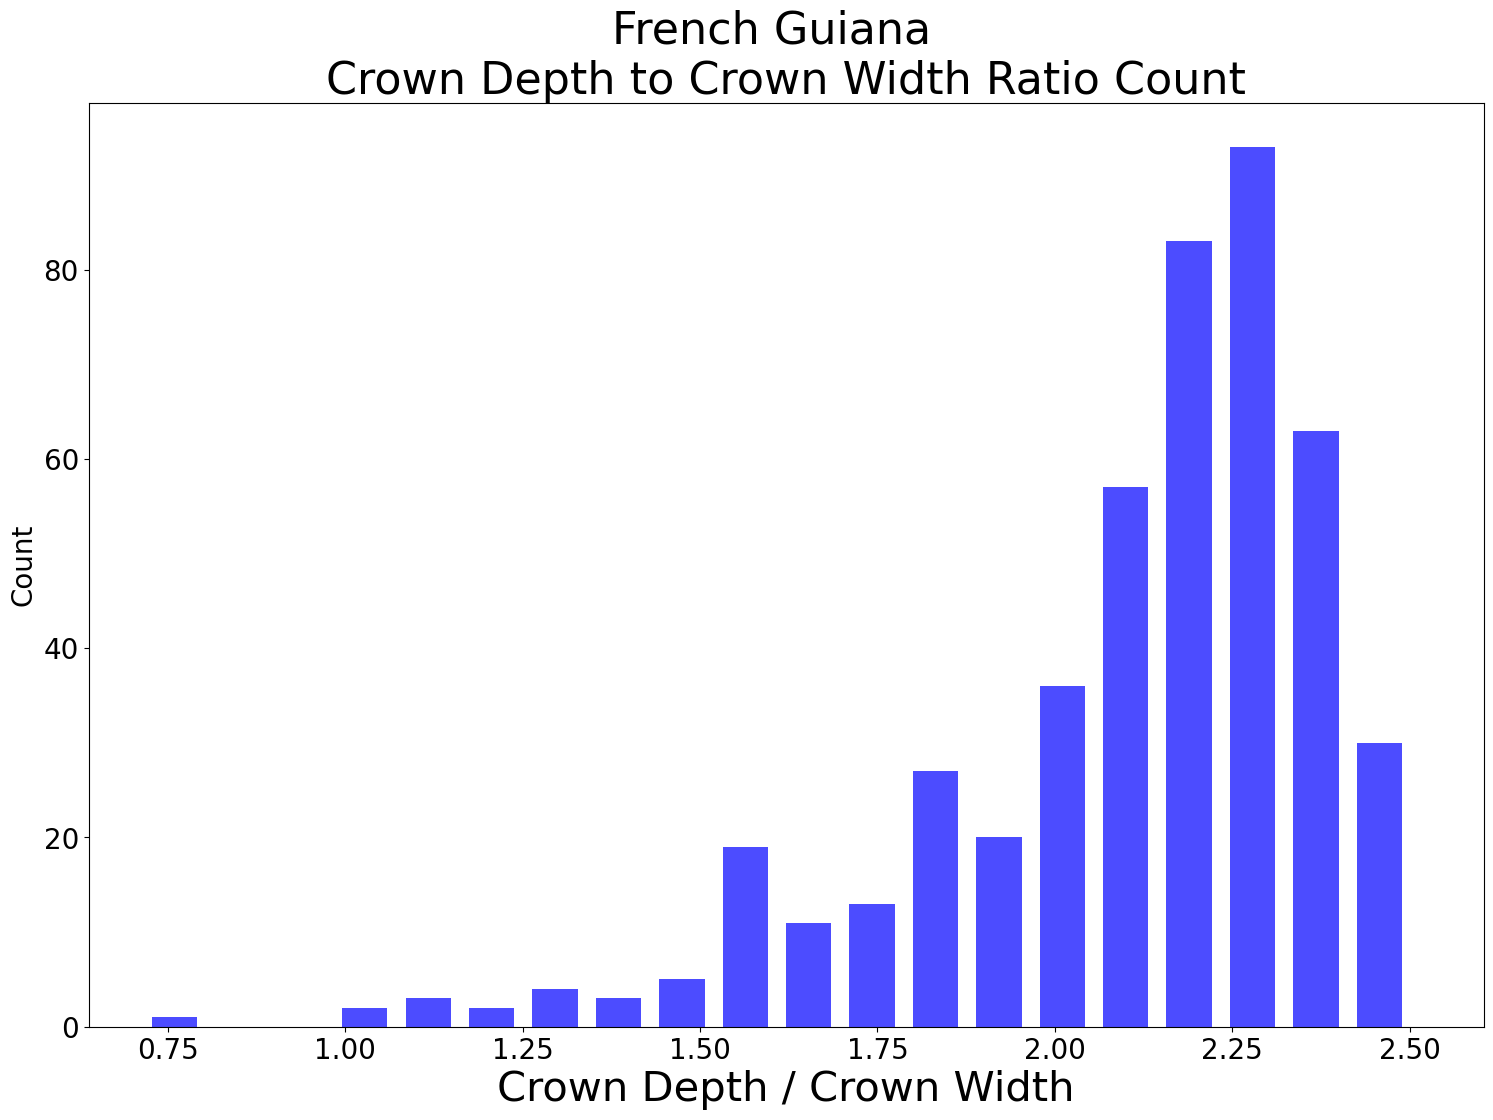

In [10]:
plot_crown_radius_count(guiana_tree_objects_leaf_orig, guiana_circle_objects_leaf_orig, guiana_output_file_path, "guiana_crown_radius_count.png", "French Guiana")
plot_tree_height_count(guiana_tree_objects_leaf_orig, guiana_circle_objects_leaf_orig, guiana_output_file_path, "guiana_tree_height_count.png", "French Guiana")
plot_crown_width_tree_height_ratio_count(guiana_tree_objects_leaf_orig, guiana_circle_objects_leaf_orig, guiana_output_file_path, "guiana_cr_width_tree_h_ratio_count.png", "French Guiana")
plot_crown_depth_tree_height_ratio_count(guiana_tree_objects_leaf_orig, guiana_output_file_path, "guiana_cr_depth_tree_h_ratio_count.png", "French Guiana")
plot_crown_depth_crown_width_ratio_count(guiana_tree_objects_leaf_orig, guiana_output_file_path, "guiana_cr_depth_cr_width_ratio_metrics.png", "French Guiana")

In [11]:
def plot_mean_std_values(circle_objects, output_folder, output_filename, plot_title):

    circle_names = [circle.circle_name for circle in circle_objects]
    mean_d1_values = [circle.mean_crown_d1 for circle in circle_objects]
    std_d1_values = [circle.std_crown_d1 for circle in circle_objects]
    mean_d2_values = [circle.mean_crown_d2 for circle in circle_objects]
    std_d2_values = [circle.std_crown_d2 for circle in circle_objects]
    mean_crown_center_height = [circle.mean_crown_center_height for circle in circle_objects]
    std_crown_center_height = [circle.std_crown_center_height for circle in circle_objects]
    mean_tree_height = [circle.mean_tree_height for circle in circle_objects]
    std_tree_height = [circle.std_tree_height for circle in circle_objects]
    LAI_per_pixel = [circle.LAI_without_branch for circle in circle_objects]
    Fa = [circle.Fa for circle in circle_objects]

    # Create subplots
    fig, axs = plt.subplots(2, 3, figsize=(35, 24))

    # Set global plot parameters
    plt.rcParams['axes.titlesize'] = 24
    plt.rcParams['axes.labelsize'] = 22
    plt.rcParams['xtick.labelsize'] = 20
    plt.rcParams['ytick.labelsize'] = 20

    # Plot data
    axs[0, 0].bar(circle_names, mean_d1_values, yerr=std_d1_values, capsize=5)
    axs[0, 0].set_title('Mean and Std of Vertical Crown Radius')
    axs[0, 0].set_ylabel('d1 Values (meters)', fontsize=30)

    axs[0, 1].bar(circle_names, mean_d2_values, yerr=std_d2_values, capsize=5)
    axs[0, 1].set_title('Mean and Std of Horizontal Crown Radius')
    axs[0, 1].set_ylabel('d2 Values (meters)', fontsize=30)

    axs[0, 2].bar(circle_names, mean_crown_center_height, yerr=std_crown_center_height, capsize=5)
    axs[0, 2].set_title('Mean and Std of Crown Center Height')
    axs[0, 2].set_ylabel('Crown Center Height Values (meters)', fontsize=30)

    axs[1, 0].bar(circle_names, mean_tree_height, yerr=std_tree_height, capsize=5)
    axs[1, 0].set_title('Mean and Std of Tree Height')
    axs[1, 0].set_ylabel('Tree Height Values (meters)', fontsize=30)

    axs[1, 1].bar(circle_names, LAI_per_pixel)
    axs[1, 1].set_title('LAI (leaf only) per Unit Area')
    axs[1, 1].set_ylabel('LAI (leaf only) per Pixel', fontsize=30)

    axs[1, 2].bar(circle_names, Fa)
    axs[1, 2].set_title('Fa')
    axs[1, 2].set_ylabel('Fa Values')

    for ax in axs.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)

    # Set the suptitle and adjust layout
    plt.suptitle(f'{plot_title} \nMean and Std Values', x=0.5, y=0.95, fontsize=36)

    plt.subplots_adjust(top=0.88, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)

    # Save the figure as a PNG image to the output folder
    output_file_path = os.path.join(output_folder, output_filename)
    plt.savefig(output_file_path)

    # Show the plot
    plt.show()

/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)


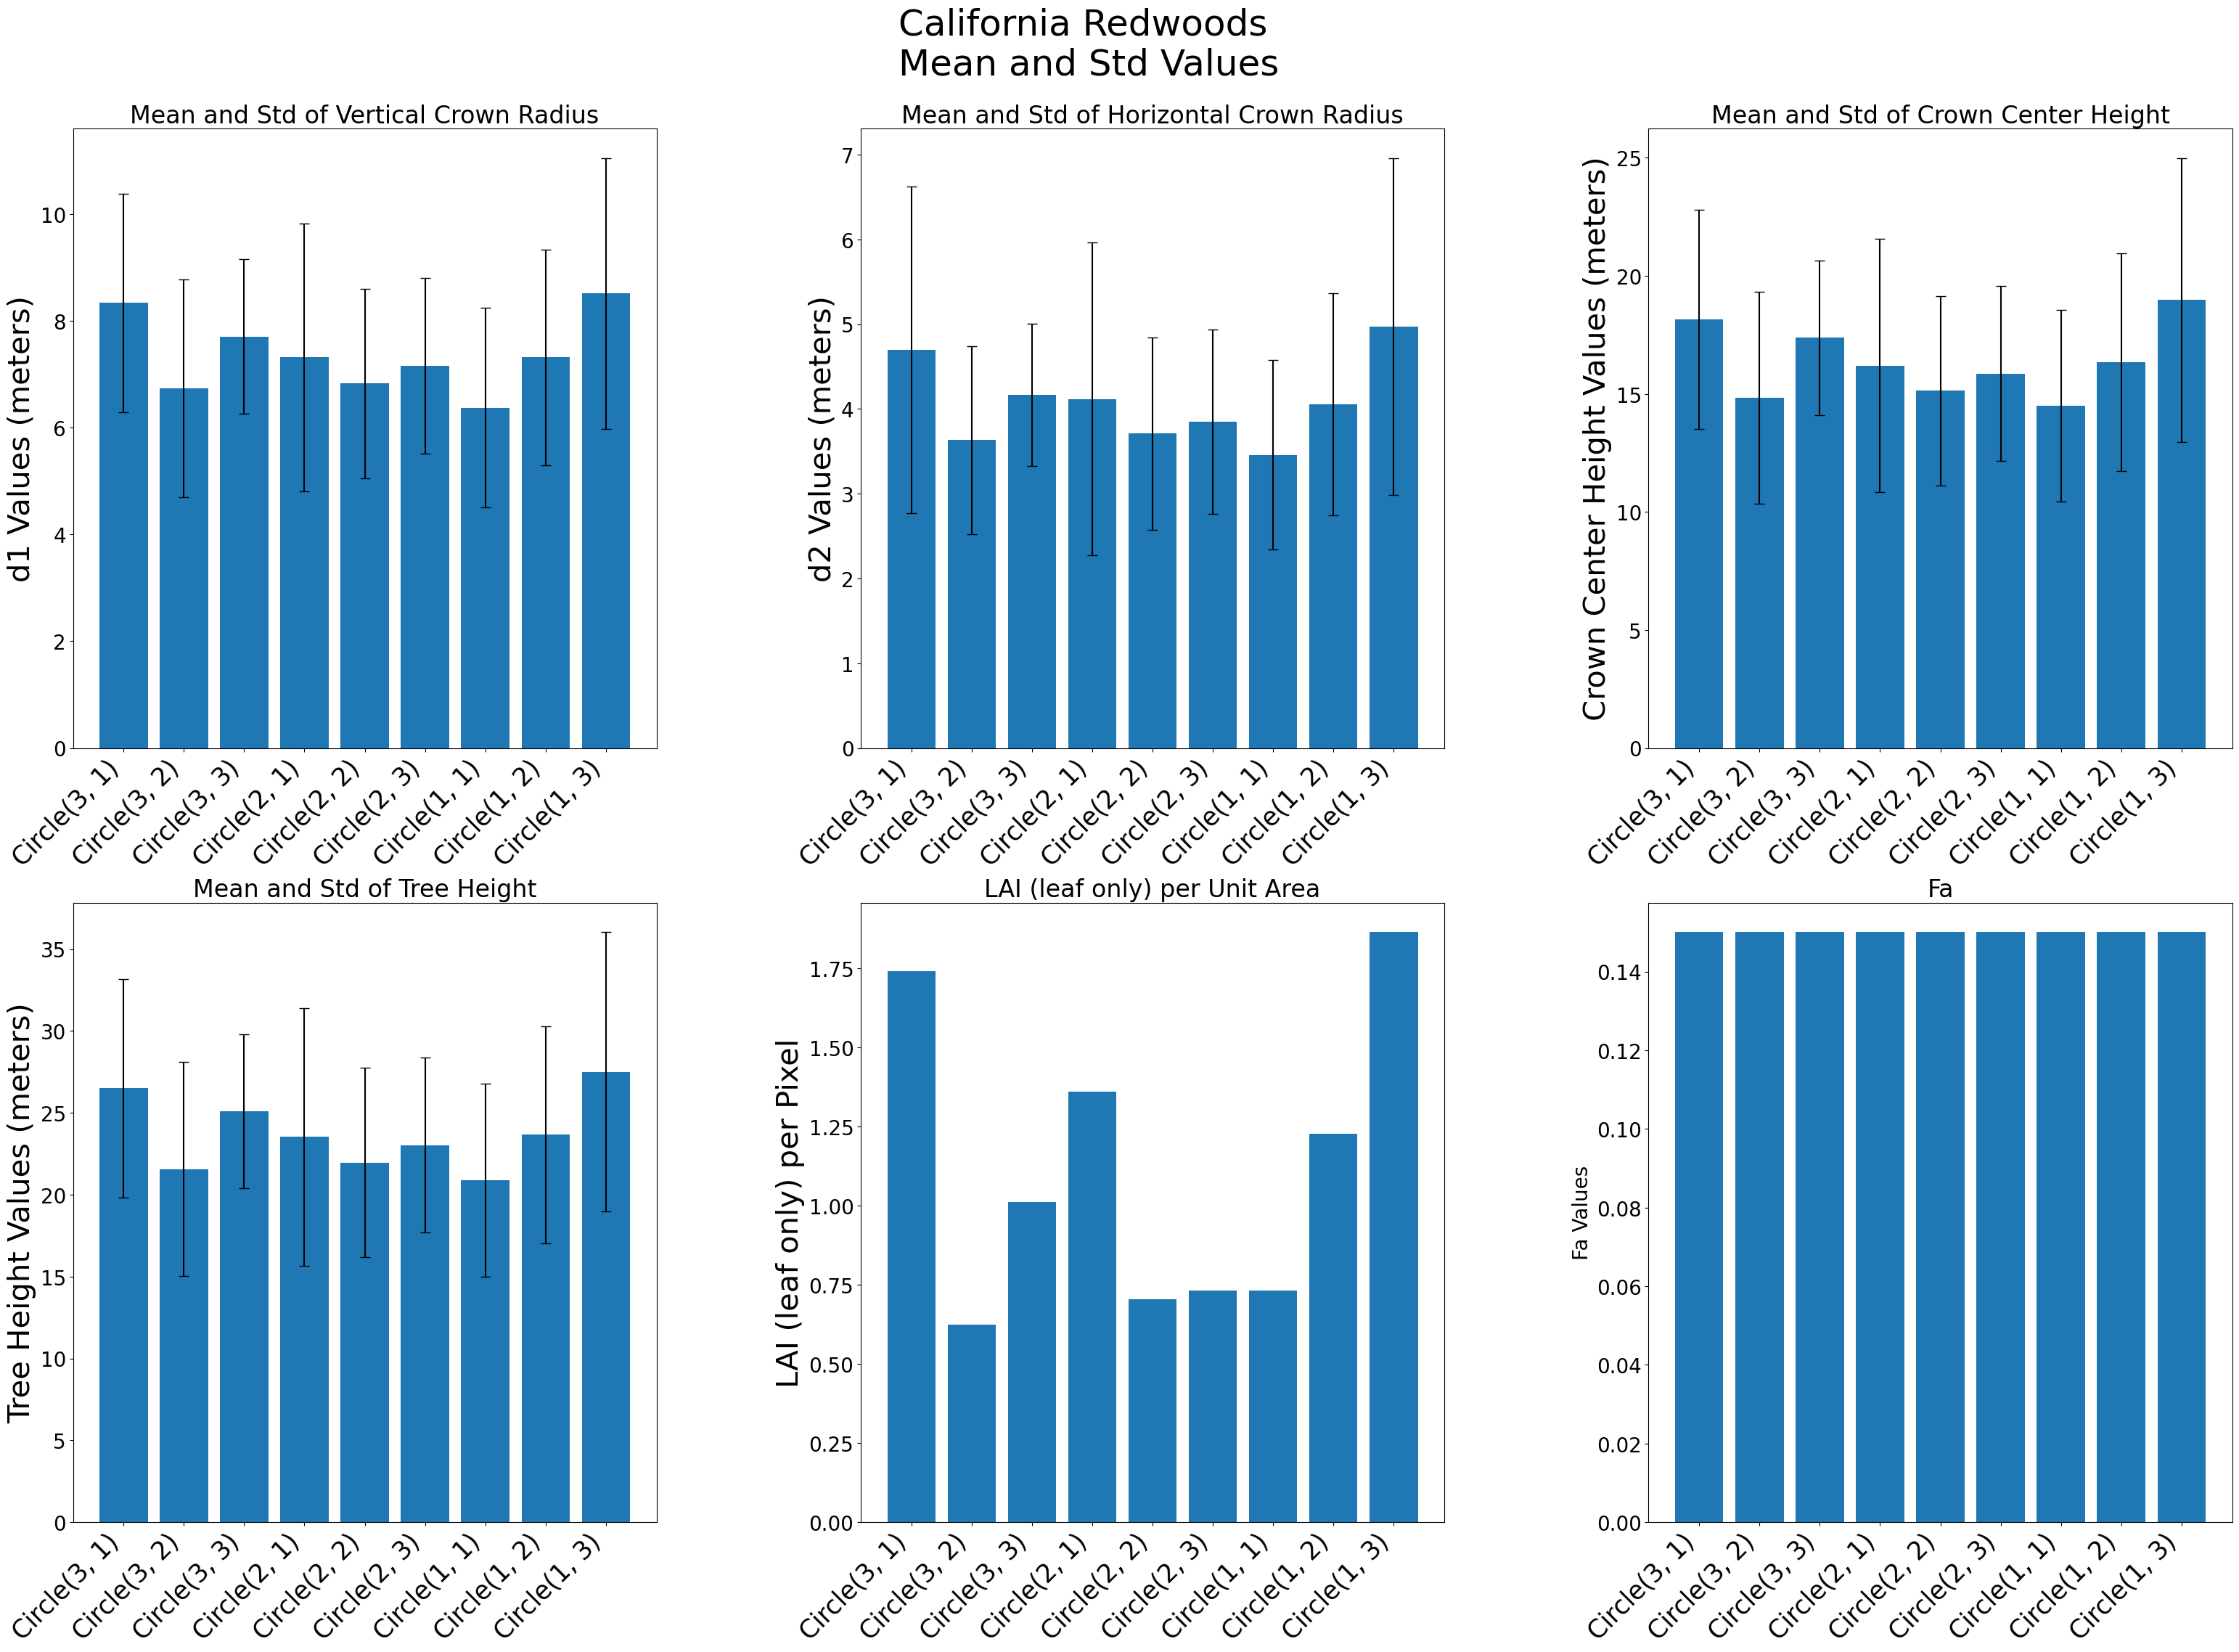

/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)
/tmp/ipykernel_3496470/4111724504.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=25)


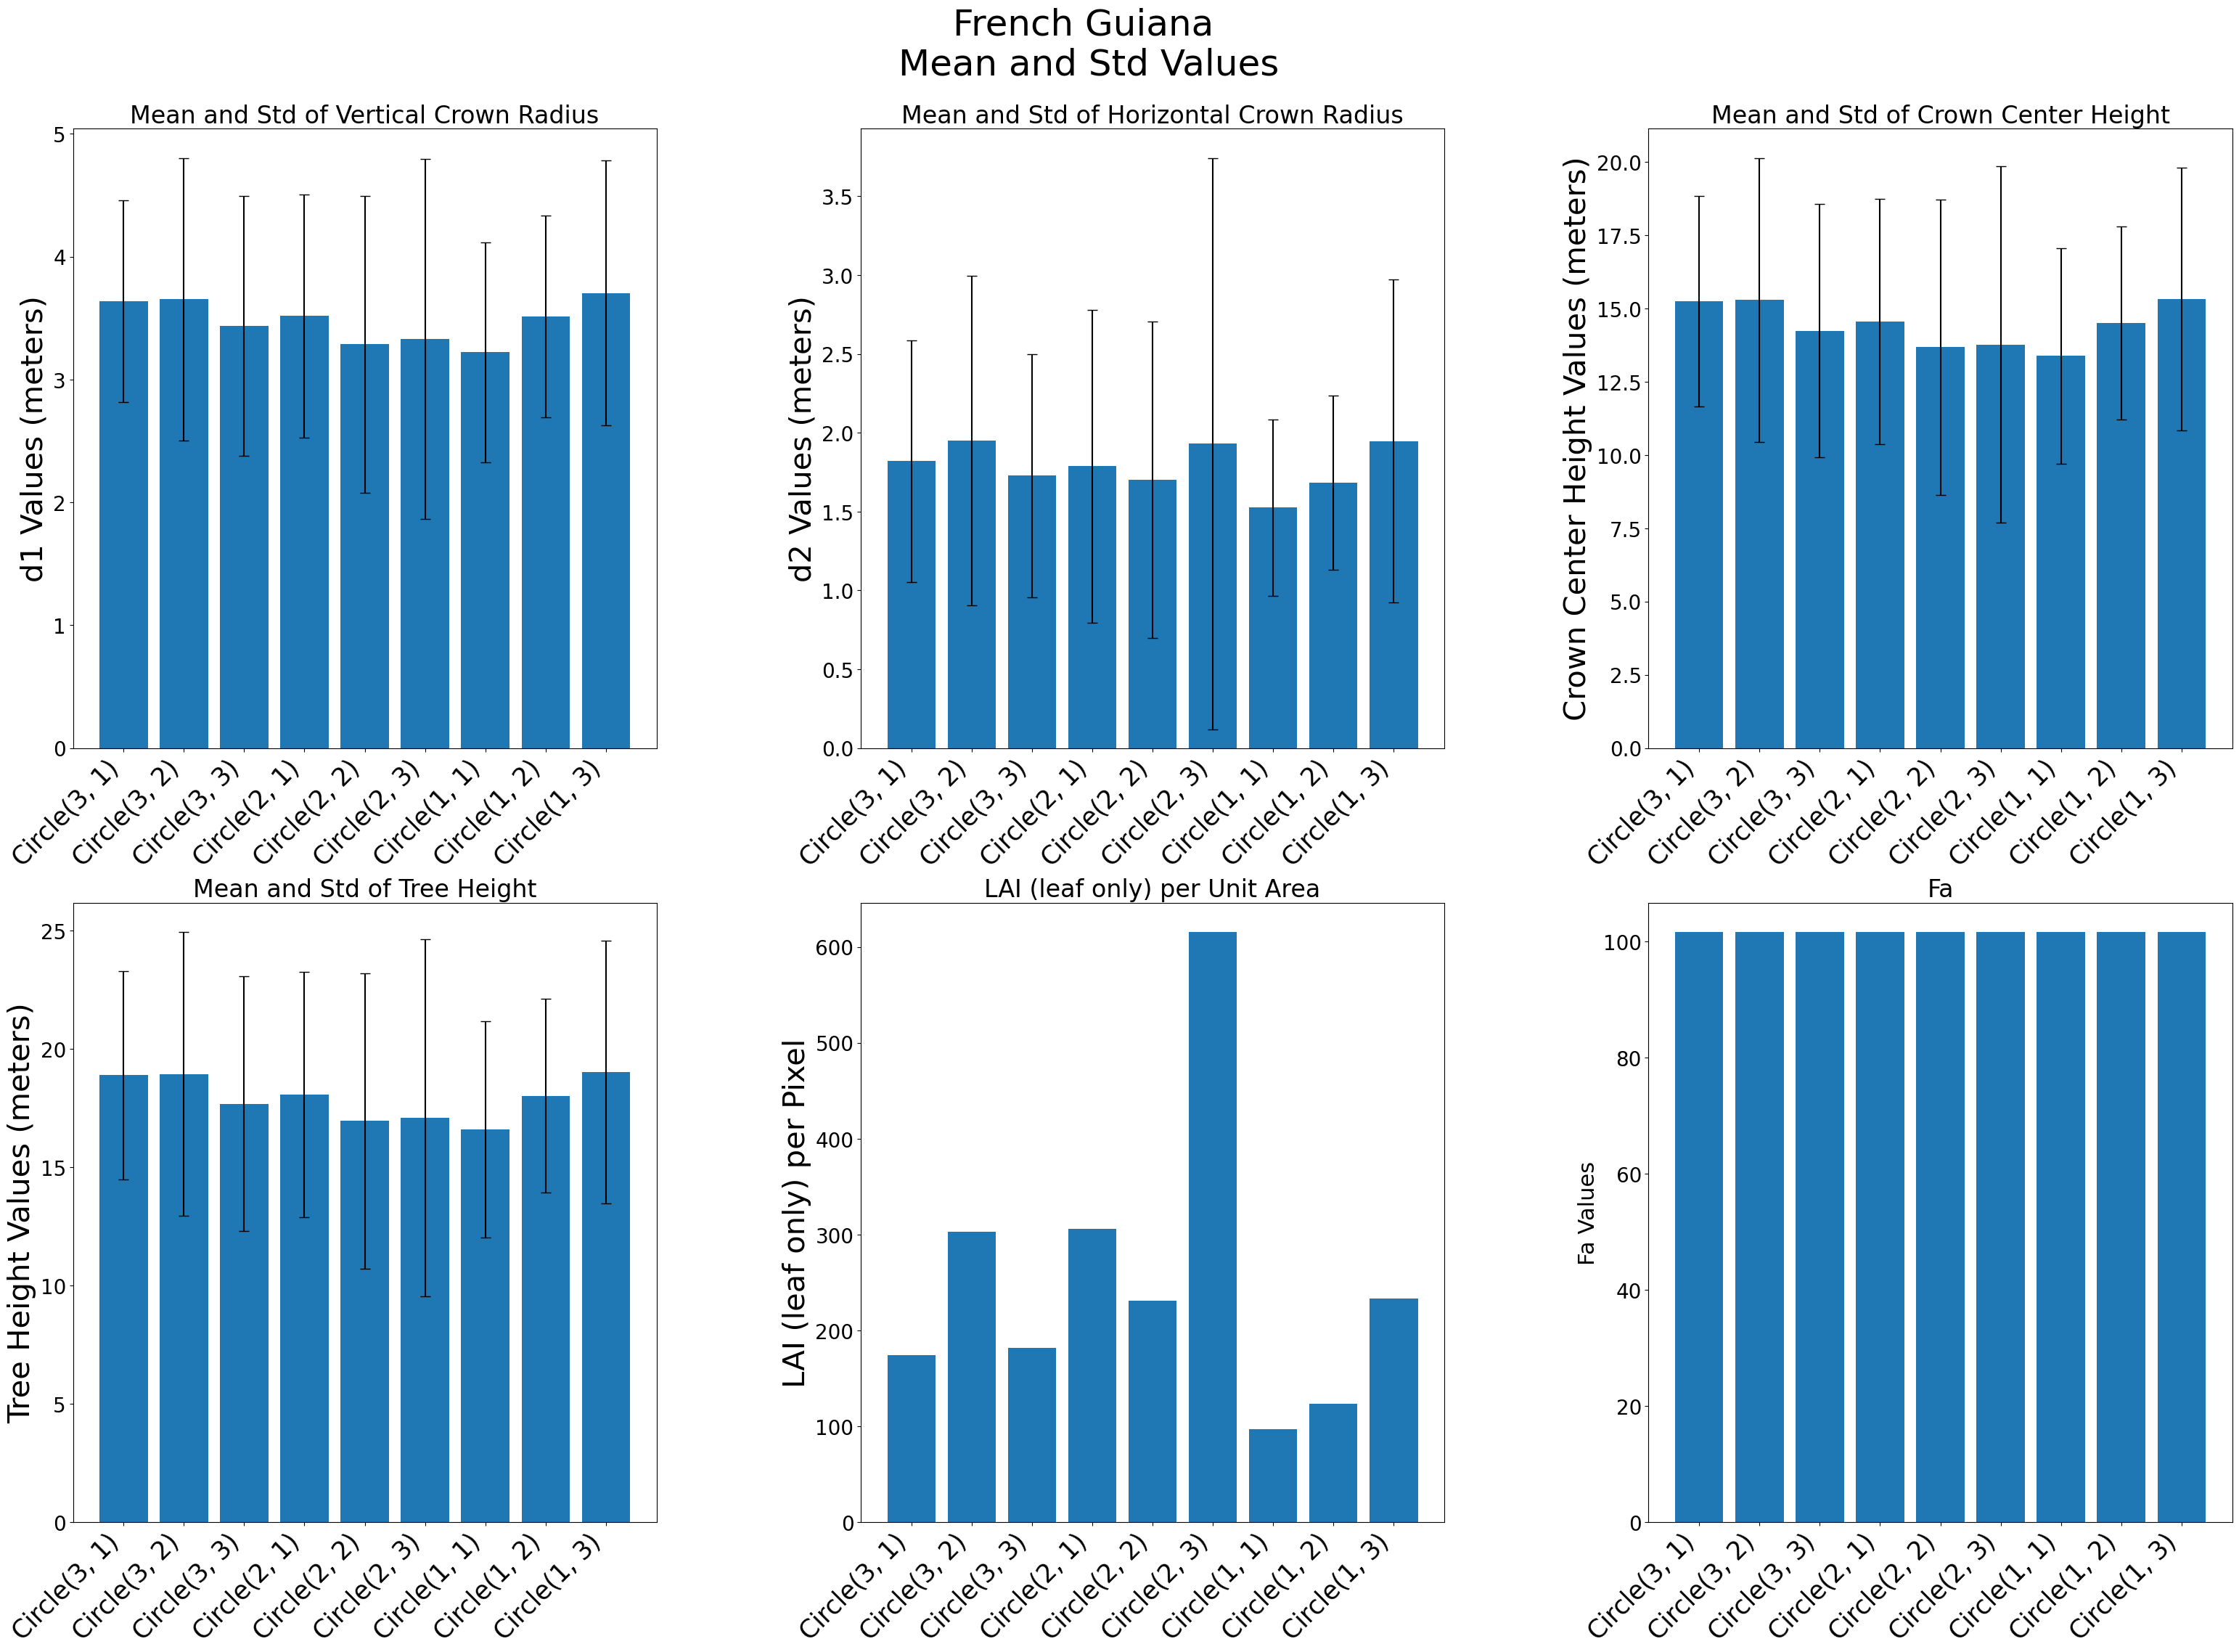

In [12]:
plot_mean_std_values(redwood_circle_objects_orig, redwood_output_file_path, "redwood_mean_std_plots.png", "California Redwoods")
plot_mean_std_values(guiana_circle_objects_leaf_orig, guiana_output_file_path, "guiana_mean_std_plots.png", "French Guiana")